In [1]:
import pandas as pd
import numpy as np # for kmeans - data needs to be array 
# need to normalize data 
import matplotlib.pyplot as plt # for data viz 
import seaborn as sns # for data viz # not working in base envr but working in OSMNX envr 

In [2]:
# things to try: 
# less dimensions (less years or PCA)
# or more data points (use age groups)
# instead of taking average score over all the clusters, look at which k has the highest number of high scoring clusters


In [3]:
df = pd.read_csv('/Users/elizabethmarsh/Desktop/Yan/bmi_rate_standardized.csv')
df

country  iso    sex        super_region           region  year  \
0      Afghanistan  AFG    Men          South Asia       South Asia  1975   
1      Afghanistan  AFG    Men          South Asia       South Asia  1976   
2      Afghanistan  AFG    Men          South Asia       South Asia  1977   
3      Afghanistan  AFG    Men          South Asia       South Asia  1978   
4      Afghanistan  AFG    Men          South Asia       South Asia  1979   
...            ...  ...    ...                 ...              ...   ...   
16795     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2012   
16796     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2013   
16797     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2014   
16798     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2015   
16799     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2016   

            bmi      rate  
0      18.99944       NaN  
1      19.10552  0.005583  
2      19.21208  0.005577  
3      19.31905  0.005568  
4      19.42595  0.005533  
...         ...       ...  
16795  25.28484  0.001364  
16796  25.31995  0.001388  
16797  25.35622  0.001433  
16798  25.39341  0.001467  
16799  25.43149  0.001499  

[16800 rows x 8 columns]

In [4]:
#len(df['super_region'].unique())
len(df['region'].unique())

22

In [5]:
# notes from Uku
# data needs to be in wide format and then in a matrix
# so I need to convert it so that each country is a row will all the years and the rate 

df['index'] = df['iso'] + '-' + df['sex']
df_wide = df.pivot(index = 'index', columns = 'year', values = 'rate')
df_wide = df_wide.drop(columns = [1975])

In [6]:
df_wide

year           1976      1977      1978      1979      1980      1981  \
index                                                                   
AFG-Men    0.005583  0.005577  0.005568  0.005533  0.005507  0.005379   
AFG-Women  0.007540  0.007462  0.007380  0.007277  0.007200  0.007049   
AGO-Men    0.005693  0.005669  0.005615  0.005578  0.005529  0.005523   
AGO-Women  0.007362  0.007273  0.007191  0.007099  0.007026  0.006964   
ALB-Men    0.002756  0.002770  0.002773  0.002763  0.002754  0.002754   
...             ...       ...       ...       ...       ...       ...   
ZAF-Women  0.002506  0.002483  0.002450  0.002438  0.002426  0.002455   
ZMB-Men    0.006936  0.006791  0.006657  0.006544  0.006466  0.006058   
ZMB-Women  0.006665  0.006467  0.006294  0.006145  0.006029  0.005464   
ZWE-Men    0.004266  0.004219  0.004174  0.004101  0.004028  0.004013   
ZWE-Women  0.002208  0.002153  0.002107  0.002052  0.001988  0.001955   

year           1982      1983      1984      1985  ...      2007      2008  \
index                                              ...                       
AFG-Men    0.005279  0.005145  0.005049  0.004914  ...  0.003563  0.003533   
AFG-Women  0.006914  0.006791  0.006683  0.006564  ...  0.005572  0.005537   
AGO-Men    0.005461  0.005433  0.005359  0.005266  ...  0.003833  0.003710   
AGO-Women  0.006922  0.006878  0.006832  0.006771  ...  0.005648  0.005513   
ALB-Men    0.002739  0.002695  0.002650  0.002582  ...  0.004059  0.004068   
...             ...       ...       ...       ...  ...       ...       ...   
ZAF-Women  0.002486  0.002530  0.002556  0.002548  ...  0.003344  0.003262   
ZMB-Men    0.005693  0.005372  0.005084  0.004815  ...  0.002656  0.002622   
ZMB-Women  0.004962  0.004542  0.004226  0.003909  ...  0.003461  0.003476   
ZWE-Men    0.003975  0.003904  0.003818  0.003714  ...  0.001679  0.001543   
ZWE-Women  0.001920  0.001900  0.001865  0.001792  ...  0.001389  0.001379   

year           2009      2010      2011      2012      2013      2014  \
index                                                                   
AFG-Men    0.003549  0.003557  0.003619  0.003684  0.003756  0.003772   
AFG-Women  0.005516  0.005476  0.005448  0.005433  0.005411  0.005359   
AGO-Men    0.003574  0.003463  0.003377  0.003339  0.003294  0.003280   
AGO-Women  0.005373  0.005237  0.005147  0.005040  0.004967  0.004880   
ALB-Men    0.004049  0.004033  0.004041  0.004063  0.004118  0.004171   
...             ...       ...       ...       ...       ...       ...   
ZAF-Women  0.003146  0.003046  0.002951  0.002872  0.002811  0.002777   
ZMB-Men    0.002544  0.002487  0.002498  0.002525  0.002547  0.002566   
ZMB-Women  0.003469  0.003467  0.003485  0.003472  0.003458  0.003430   
ZWE-Men    0.001353  0.001248  0.001252  0.001269  0.001284  0.001332   
ZWE-Women  0.001343  0.001334  0.001354  0.001364  0.001388  0.001433   

year           2015      2016  
index                          
AFG-Men    0.003771  0.003769  
AFG-Women  0.005328  0.005278  
AGO-Men    0.003251  0.003216  
AGO-Women  0.004803  0.004686  
ALB-Men    0.004218  0.004199  
...             ...       ...  
ZAF-Women  0.002736  0.002687  
ZMB-Men    0.002563  0.002559  
ZMB-Women  0.003380  0.003312  
ZWE-Men    0.001368  0.001429  
ZWE-Women  0.001467  0.001499  

[400 rows x 41 columns]

In [7]:
# normalize each observation to range from 0 to 1 using local min/max
from sklearn.preprocessing import MinMaxScaler
norm_values = {}
scaler = MinMaxScaler(feature_range = (0, 1))
for index, row in df_wide.iterrows():
    observation = row.values # extract row vector
    observation = observation.reshape(len(observation), 1) # transform to column vector
    scaler = scaler.fit(observation)
    normalized = scaler.transform(observation)
    normalized = normalized.reshape(1, len(observation)) # transform back to row vector
    norm_values[index] = normalized.tolist()[0]
df_norm = pd.DataFrame.from_dict(norm_values, orient = 'index', columns = df_wide.columns)

In [8]:
df_norm

year           1976      1977      1978      1979      1980      1981  \
AFG-Men    1.000000  0.997172  0.992490  0.975667  0.962598  0.900571   
AFG-Women  1.000000  0.965212  0.929055  0.883791  0.849710  0.783008   
AGO-Men    1.000000  0.990432  0.968631  0.953694  0.933791  0.931288   
AGO-Women  1.000000  0.966561  0.935961  0.901775  0.874538  0.851261   
ALB-Men    0.297275  0.303955  0.305349  0.300879  0.296314  0.296266   
...             ...       ...       ...       ...       ...       ...   
ZAF-Women  0.078431  0.055294  0.023627  0.011667  0.000000  0.027647   
ZMB-Men    1.000000  0.970585  0.943598  0.920738  0.904999  0.822318   
ZMB-Women  1.000000  0.954409  0.914425  0.880024  0.853329  0.722948   
ZWE-Men    1.000000  0.984592  0.969748  0.945560  0.921339  0.916236   
ZWE-Women  1.000000  0.945993  0.901345  0.847631  0.785533  0.753071   

year           1982      1983      1984      1985  ...      2007      2008  \
AFG-Men    0.851709  0.786512  0.739309  0.673819  ...  0.014775  0.000000   
AFG-Women  0.723069  0.668833  0.621226  0.568625  ...  0.130000  0.114574   
AGO-Men    0.906338  0.895075  0.864998  0.827493  ...  0.249051  0.199394   
AGO-Women  0.835531  0.819017  0.801943  0.779227  ...  0.359462  0.309210   
ALB-Men    0.289346  0.268249  0.246576  0.213513  ...  0.923783  0.927676   
...             ...       ...       ...       ...  ...       ...       ...   
ZAF-Women  0.058627  0.101078  0.126961  0.119118  ...  0.899706  0.819608   
ZMB-Men    0.748559  0.683518  0.625417  0.570897  ...  0.134207  0.127248   
ZMB-Women  0.606940  0.510060  0.437220  0.364173  ...  0.260717  0.264155   
ZWE-Men    0.903711  0.880318  0.851590  0.817064  ...  0.142942  0.097946   
ZWE-Women  0.719633  0.699844  0.665334  0.594268  ...  0.201989  0.192143   

year           2009      2010      2011      2012      2013      2014  \
AFG-Men    0.007802  0.011703  0.042229  0.073975  0.108743  0.116789   
AFG-Women  0.104982  0.087477  0.074924  0.068293  0.058701  0.035627   
AGO-Men    0.144530  0.099839  0.065079  0.049576  0.031409  0.025717   
AGO-Women  0.256977  0.206090  0.172165  0.132561  0.105212  0.072557   
ALB-Men    0.918641  0.911192  0.914941  0.925321  0.952040  0.977366   
...             ...       ...       ...       ...       ...       ...   
ZAF-Women  0.705490  0.607549  0.514706  0.436667  0.376961  0.343725   
ZMB-Men    0.111610  0.099897  0.102183  0.107645  0.112177  0.115899   
ZMB-Women  0.262701  0.262194  0.266393  0.263163  0.259933  0.253703   
ZWE-Men    0.034758  0.000000  0.001425  0.007124  0.012160  0.028032   
ZWE-Women  0.156463  0.147982  0.167771  0.176838  0.201111  0.244102   

year           2015      2016  
AFG-Men    0.116204  0.115473  
AFG-Women  0.022146  0.000000  
AGO-Men    0.014251  0.000000  
AGO-Women  0.043826  0.000000  
ALB-Men    1.000000  0.990917  
...             ...       ...  
ZAF-Women  0.303431  0.255686  
ZMB-Men    0.115312  0.114564  
ZMB-Women  0.242098  0.226409  
ZWE-Men    0.039861  0.060205  
ZWE-Women  0.277247  0.309320  

[400 rows x 41 columns]

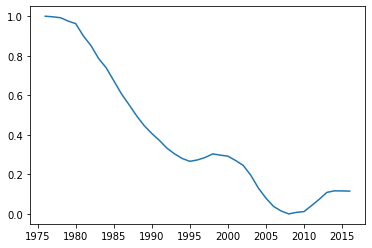

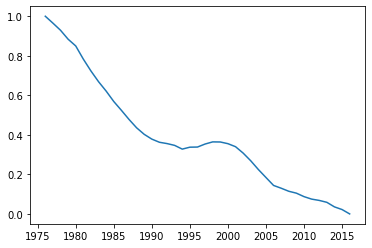

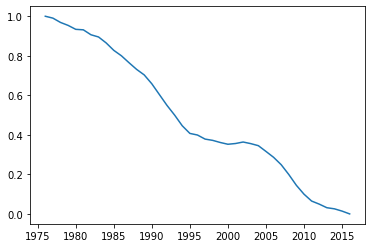

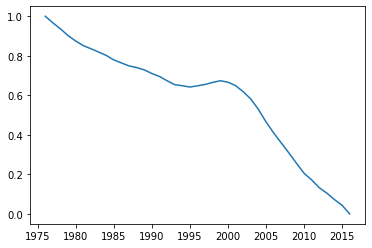

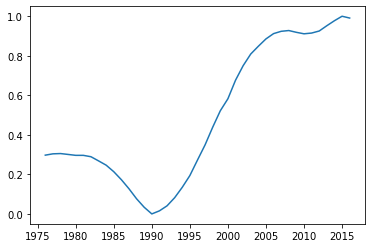

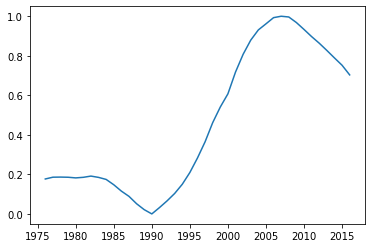

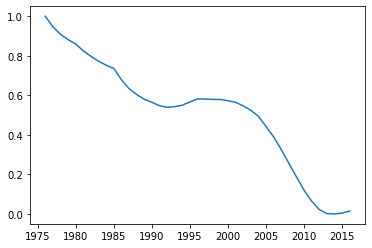

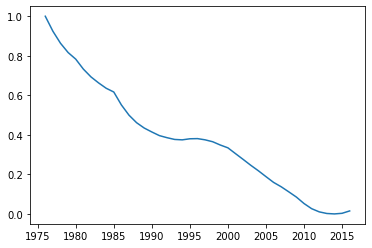

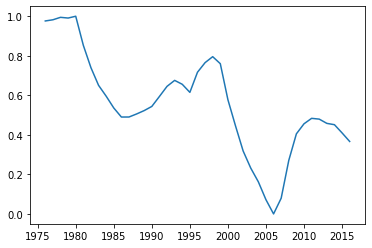

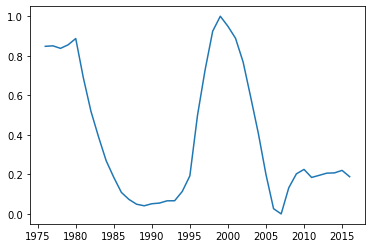

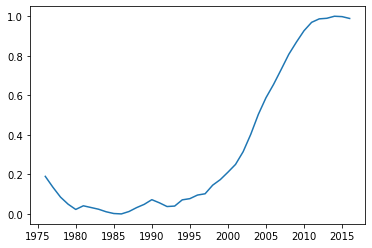

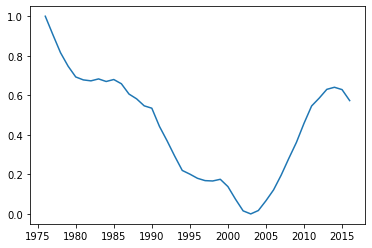

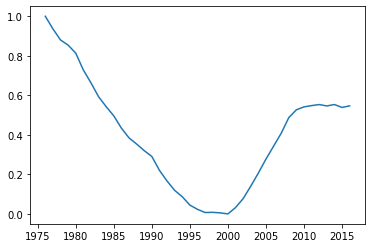

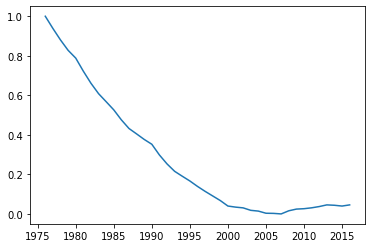

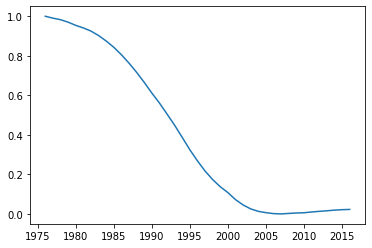

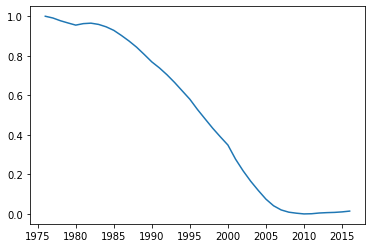

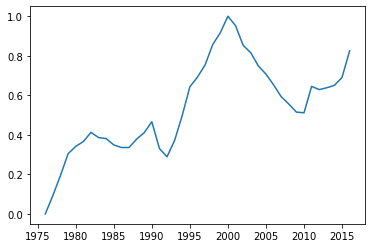

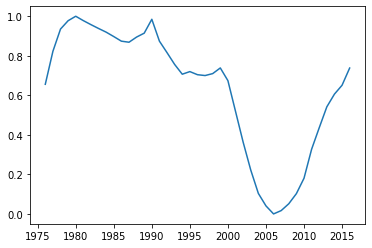

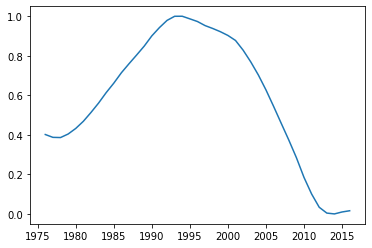

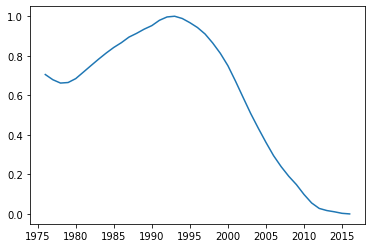

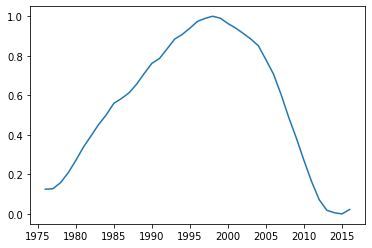

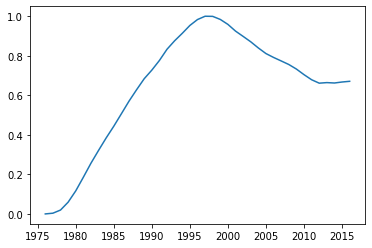

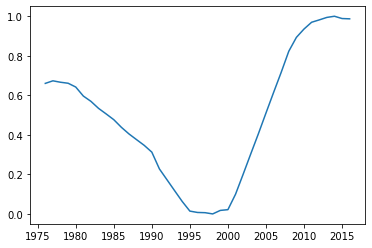

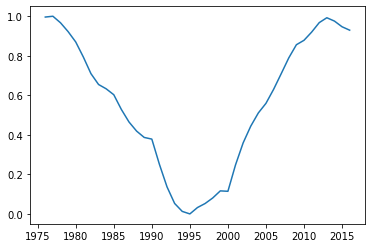

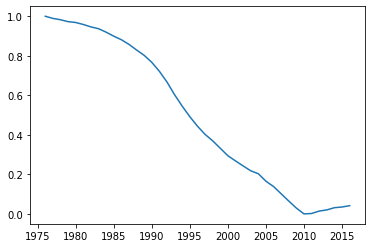

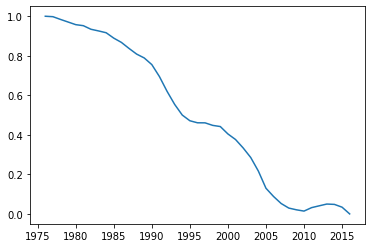

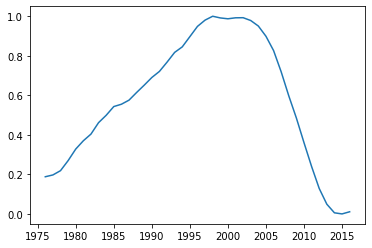

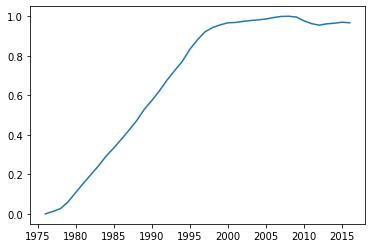

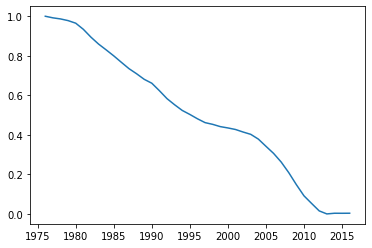

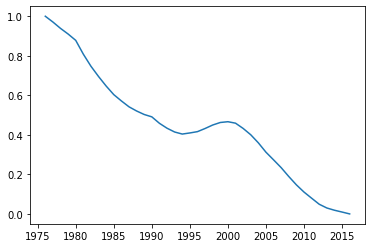

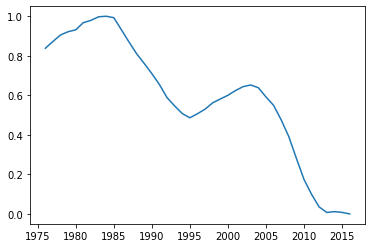

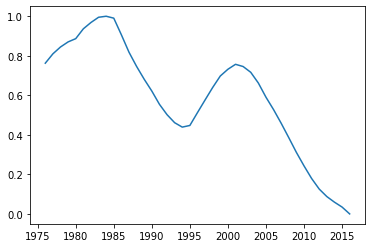

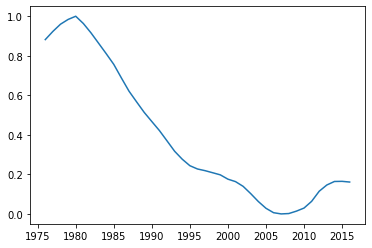

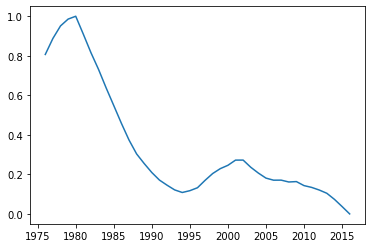

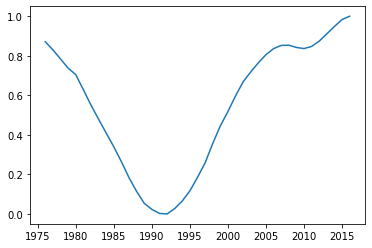

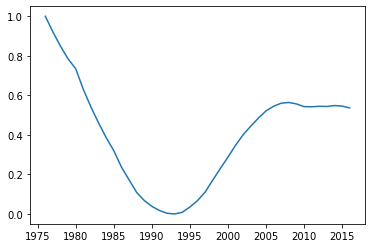

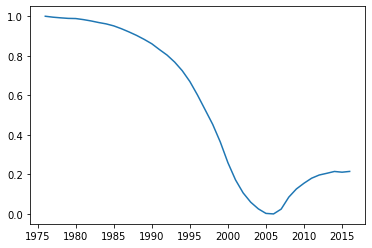

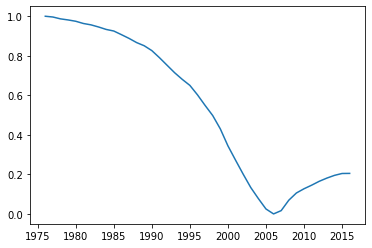

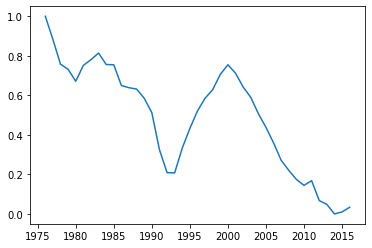

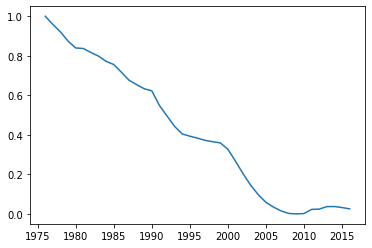

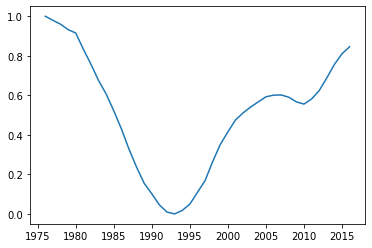

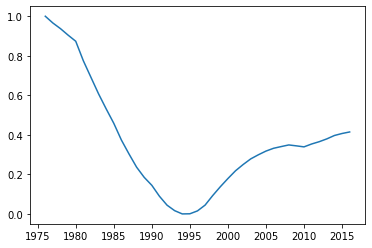

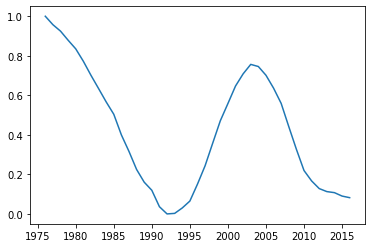

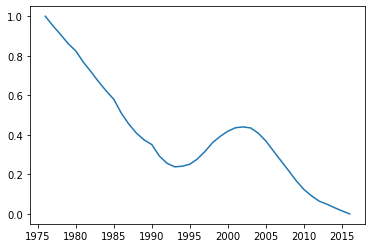

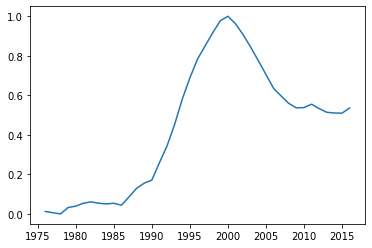

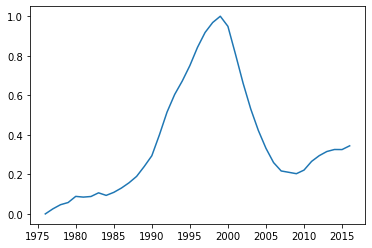

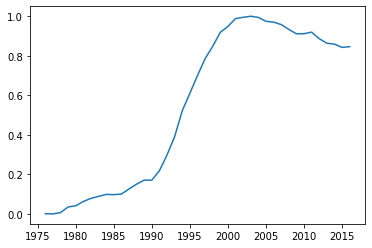

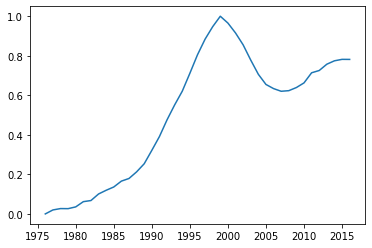

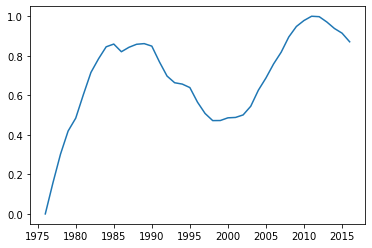

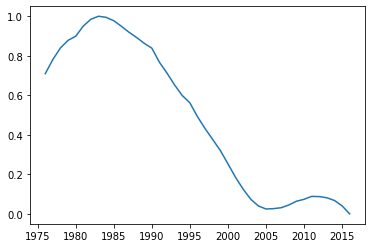

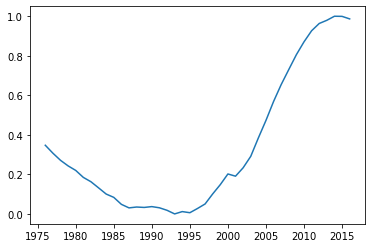

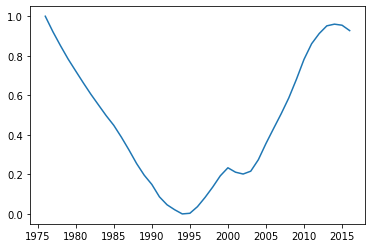

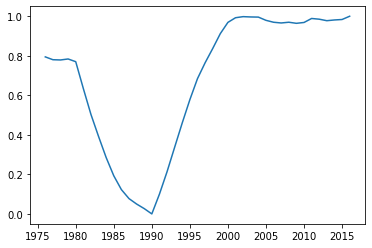

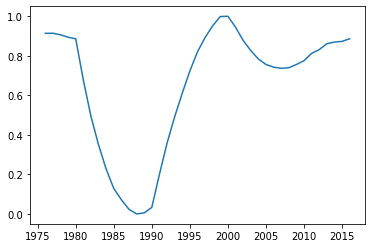

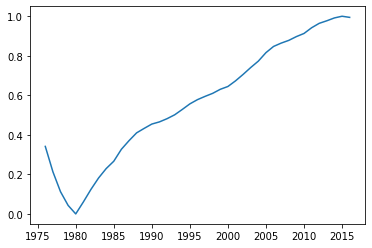

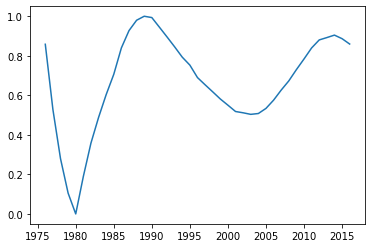

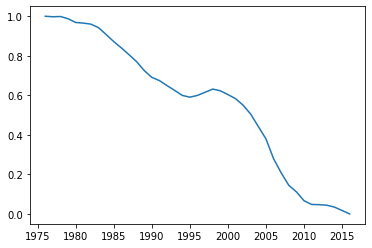

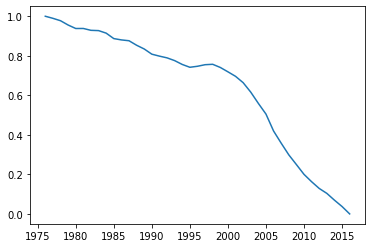

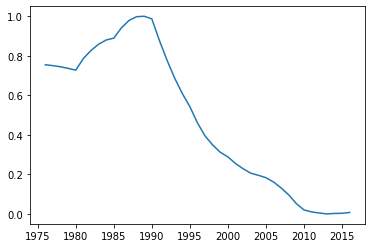

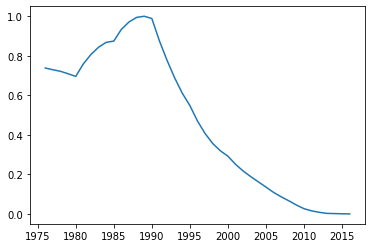

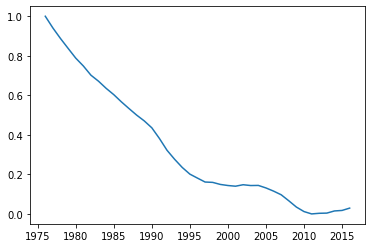

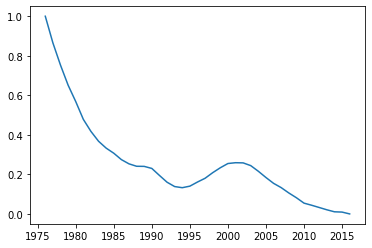

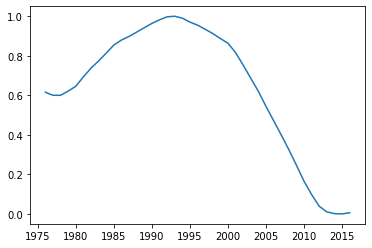

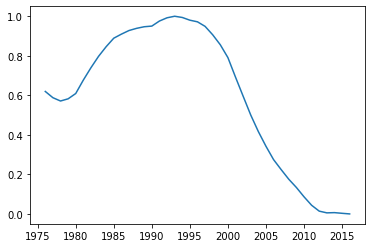

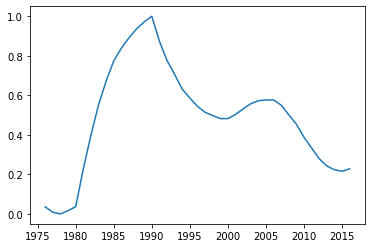

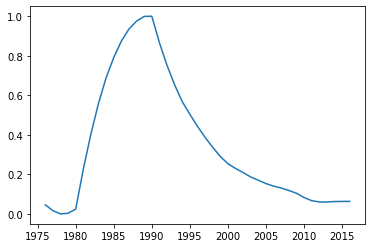

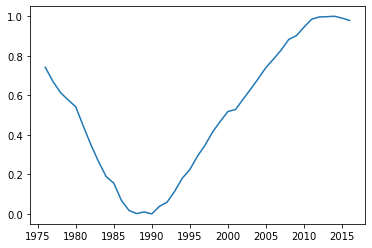

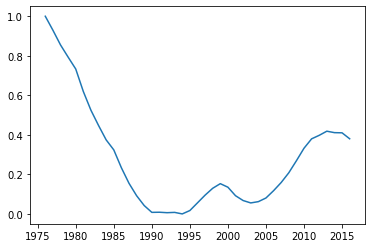

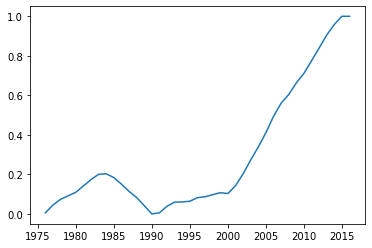

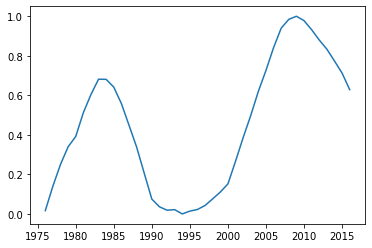

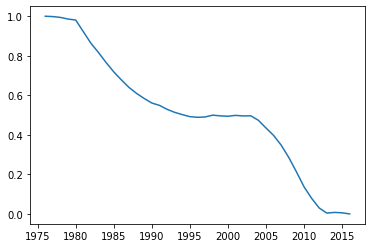

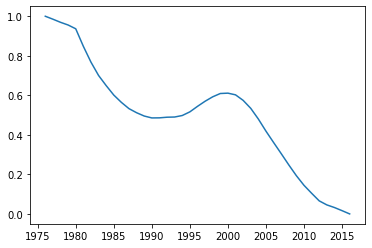

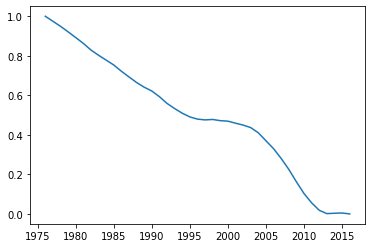

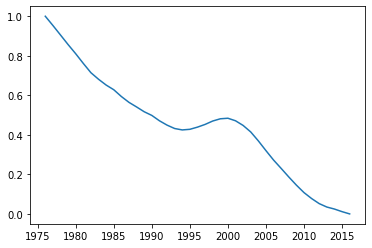

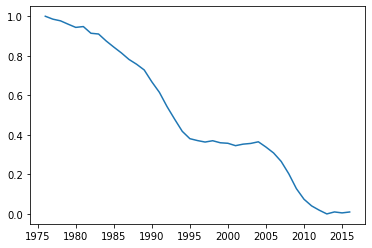

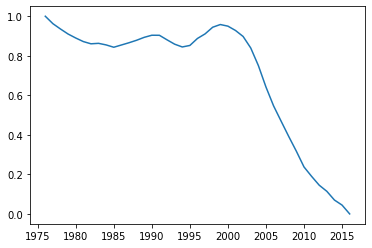

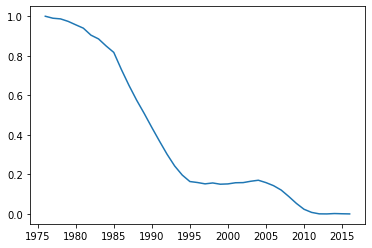

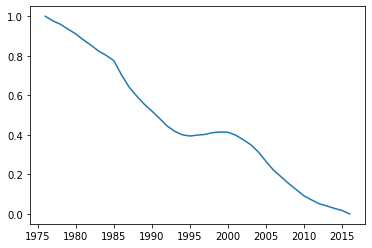

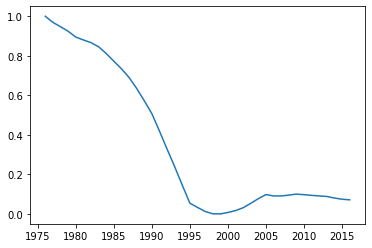

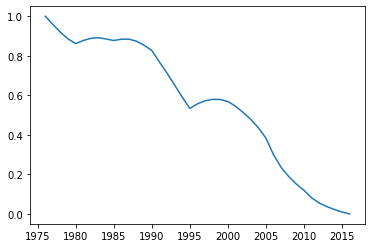

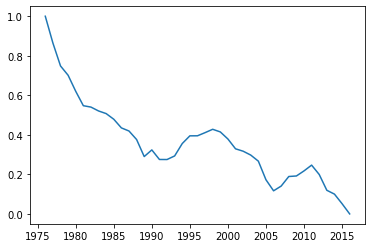

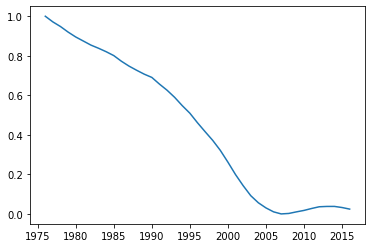

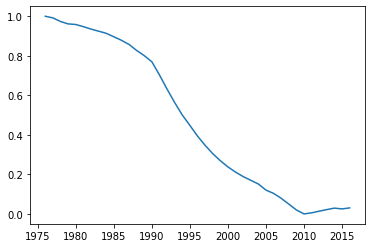

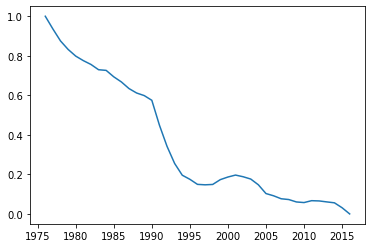

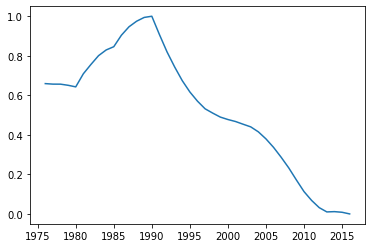

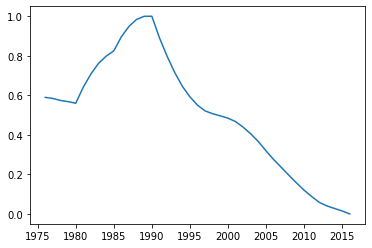

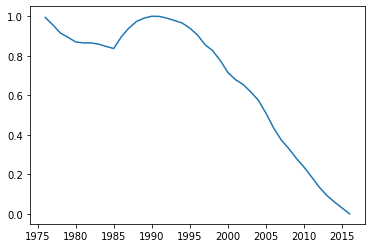

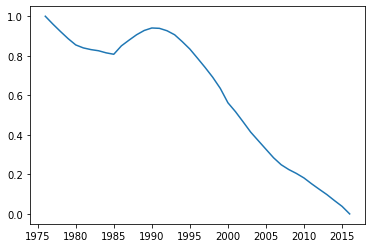

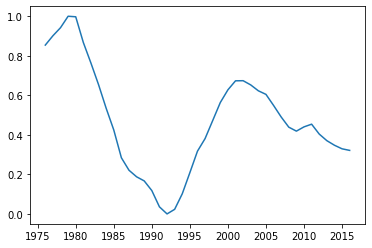

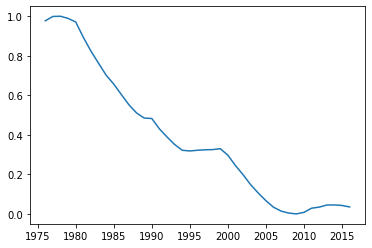

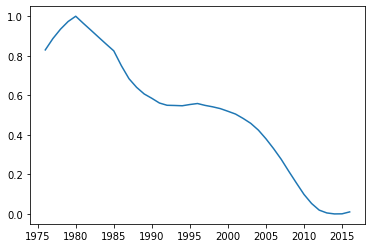

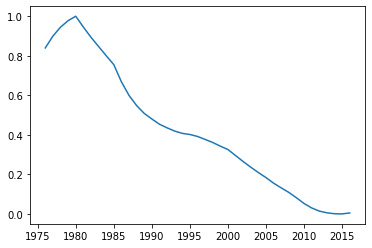

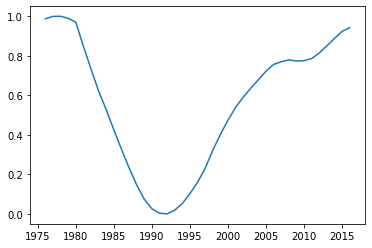

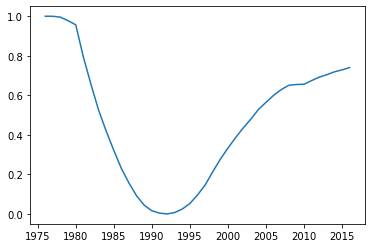

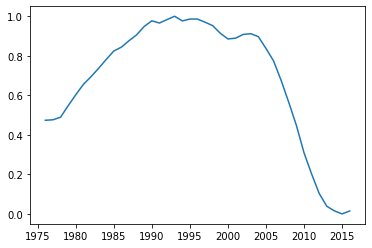

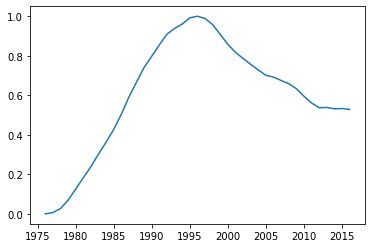

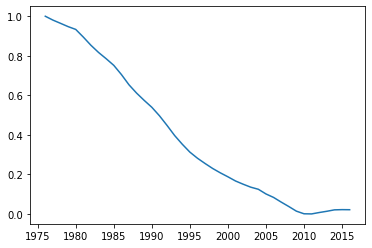

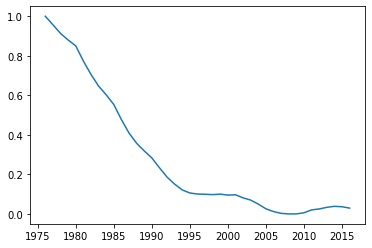

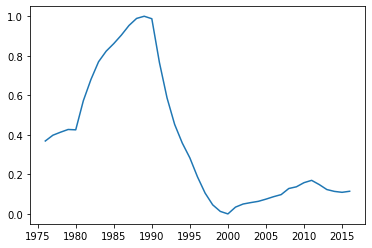

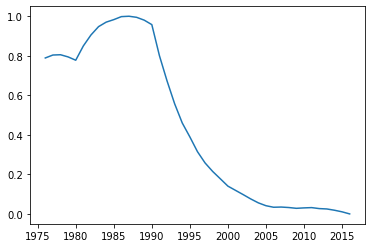

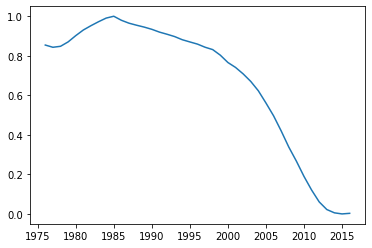

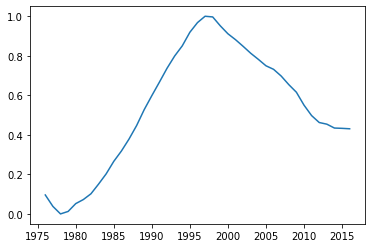

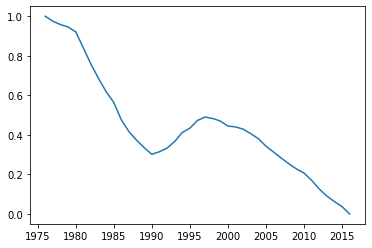

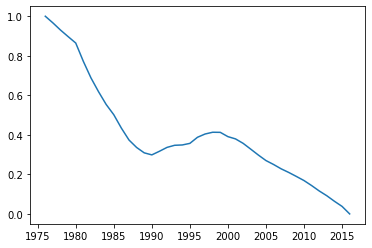

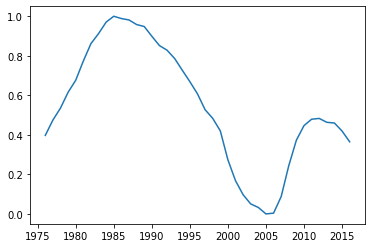

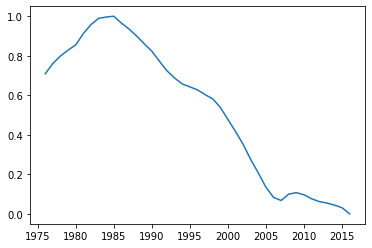

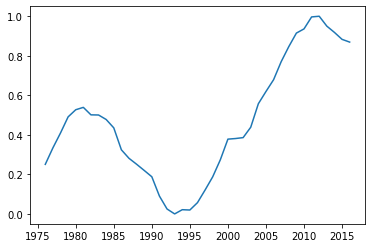

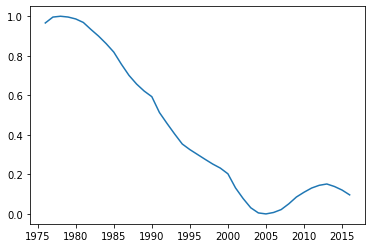

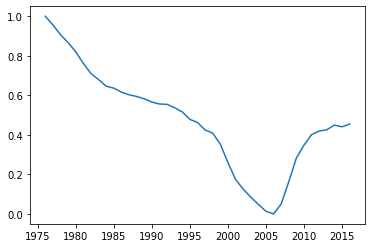

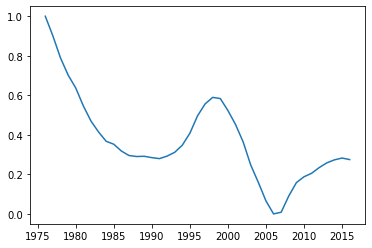

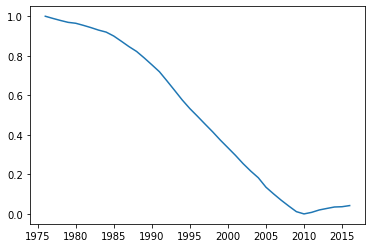

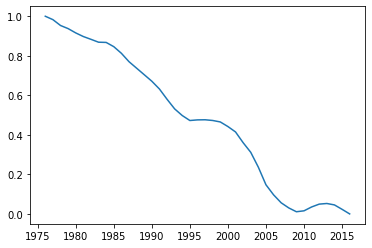

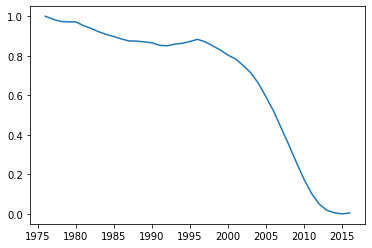

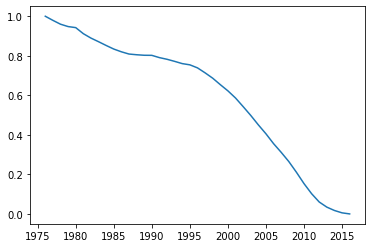

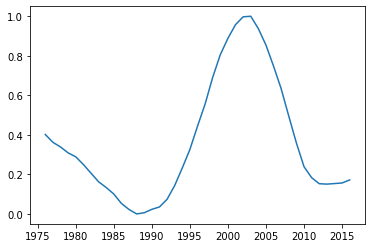

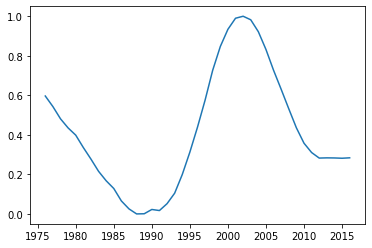

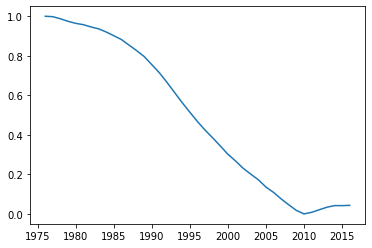

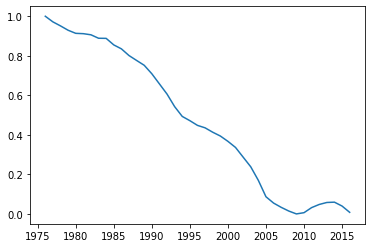

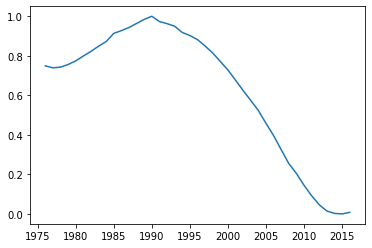

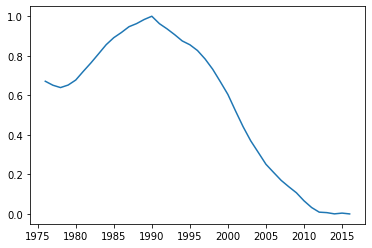

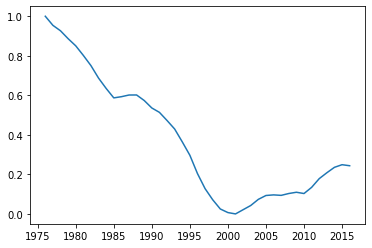

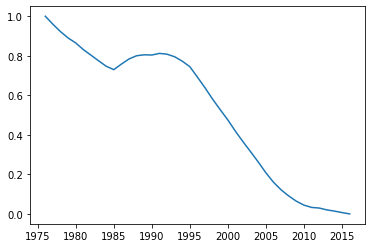

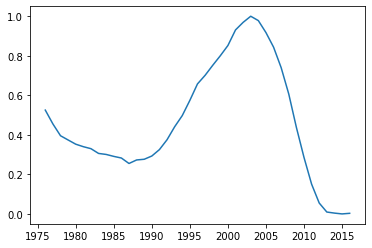

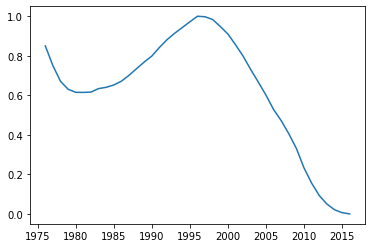

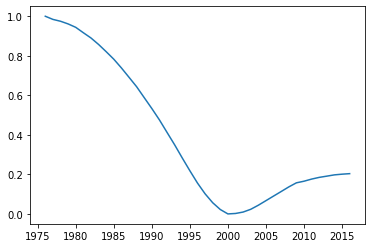

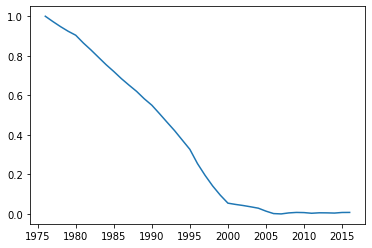

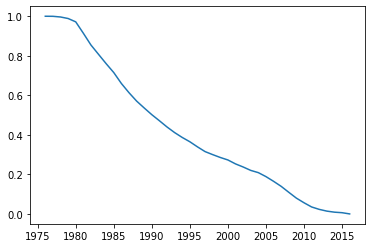

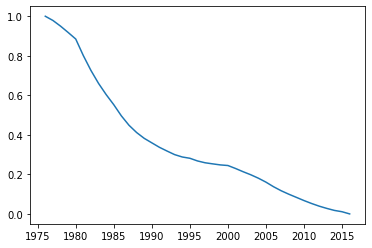

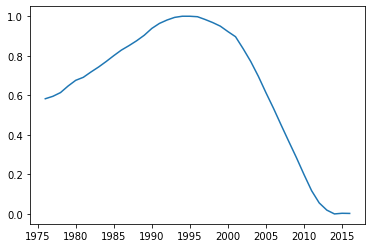

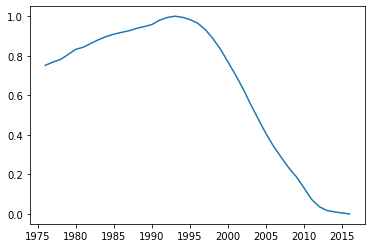

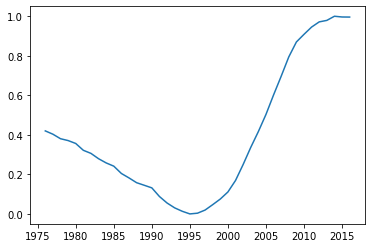

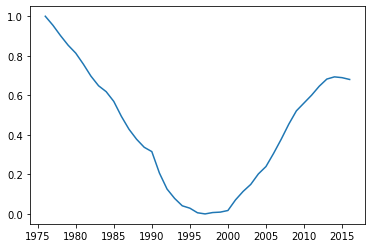

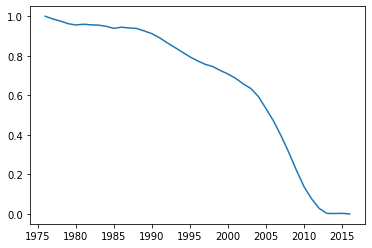

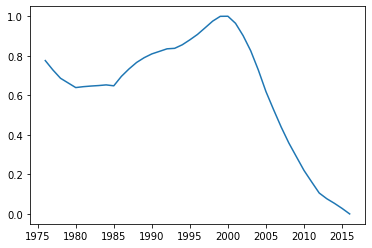

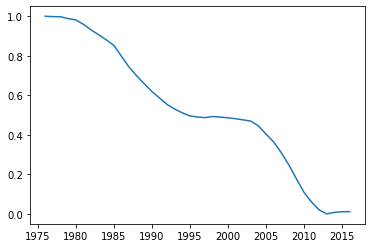

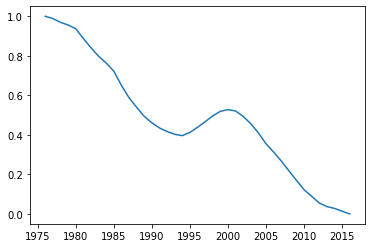

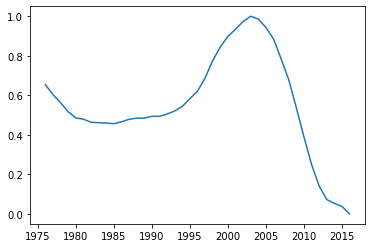

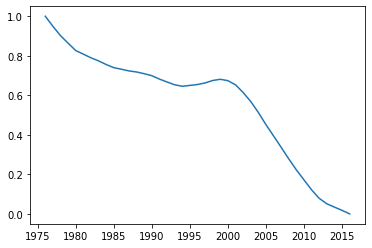

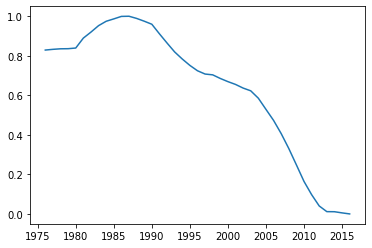

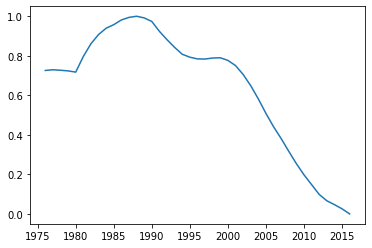

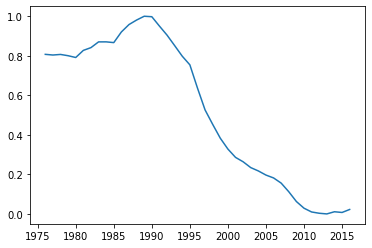

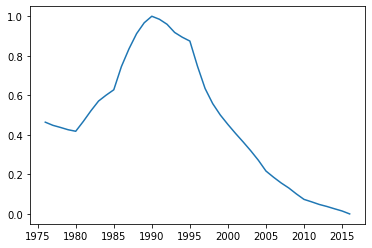

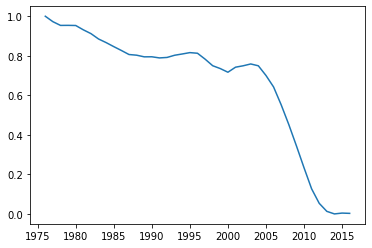

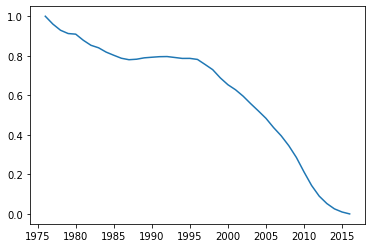

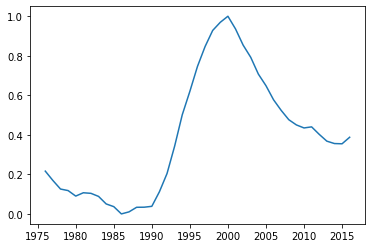

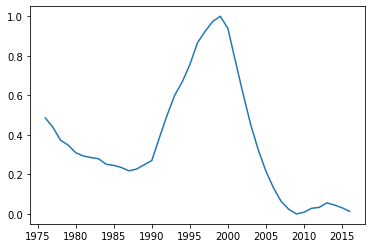

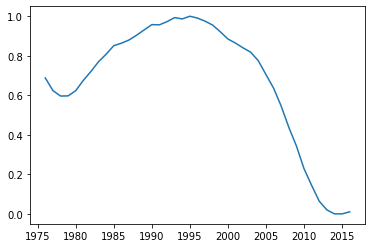

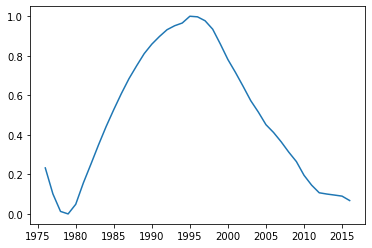

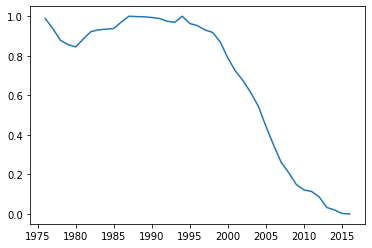

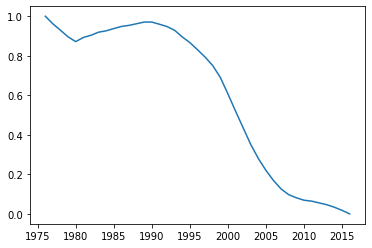

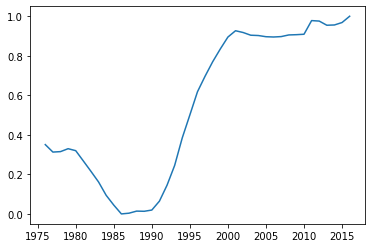

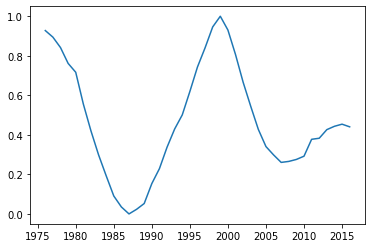

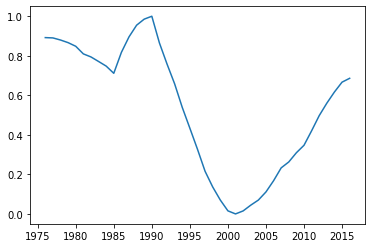

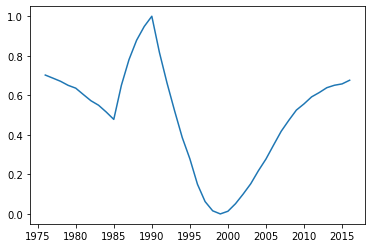

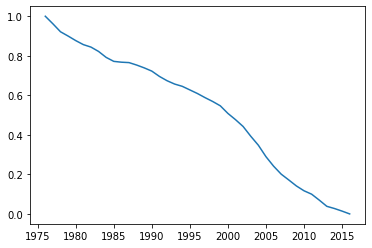

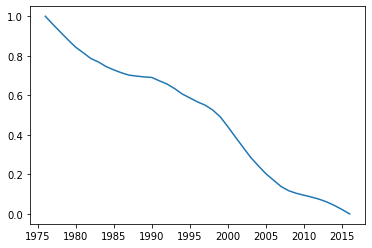

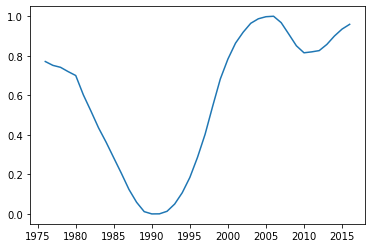

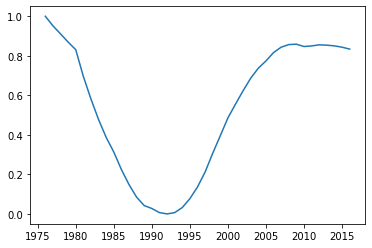

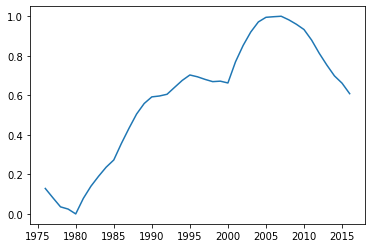

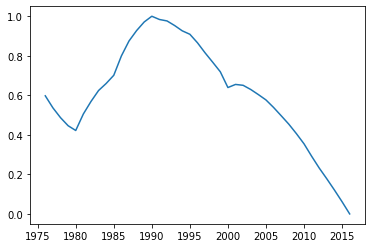

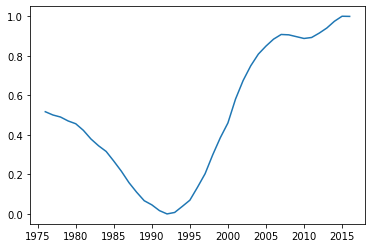

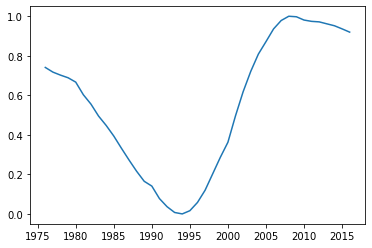

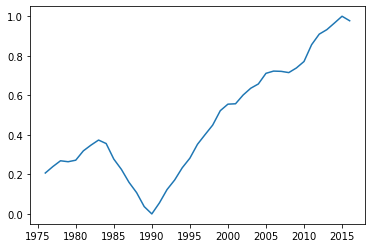

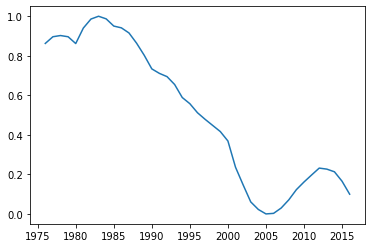

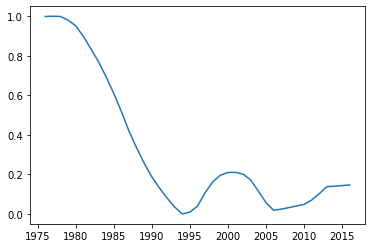

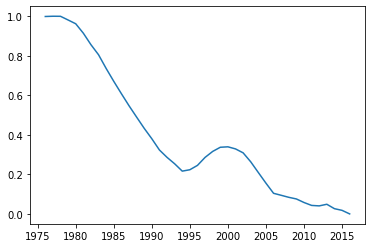

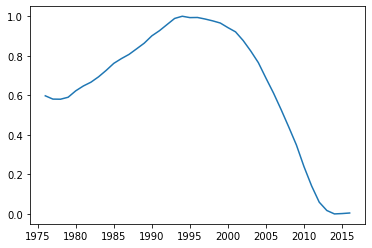

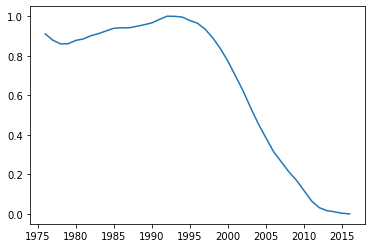

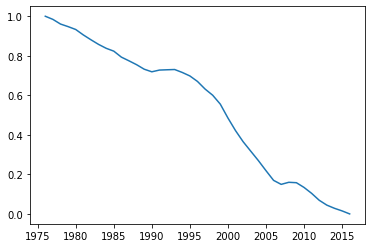

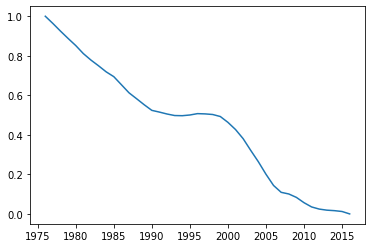

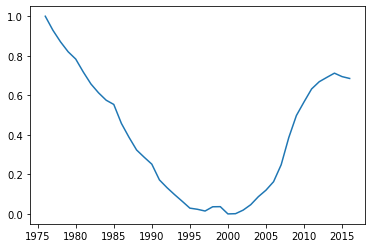

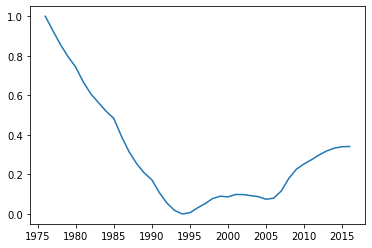

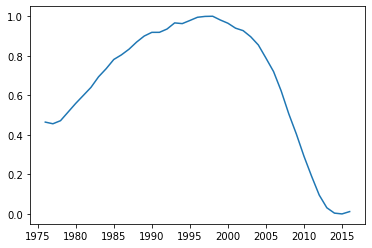

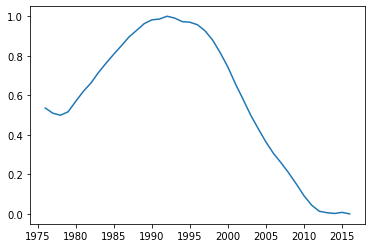

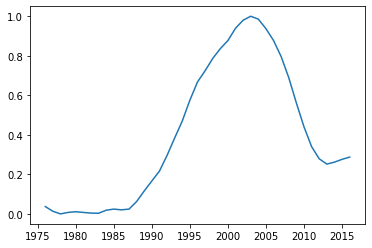

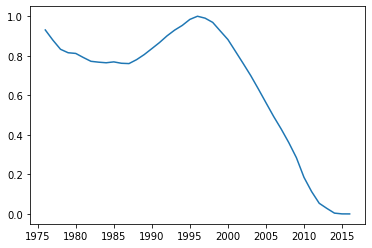

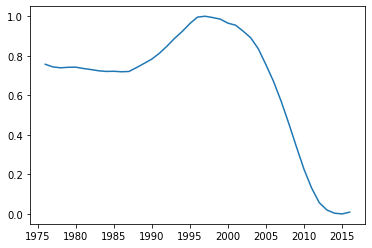

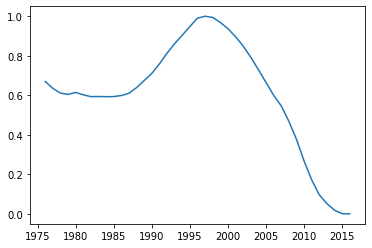

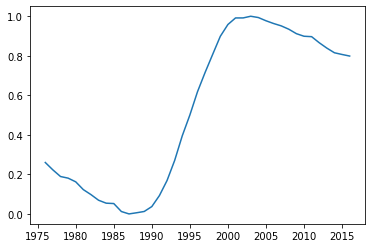

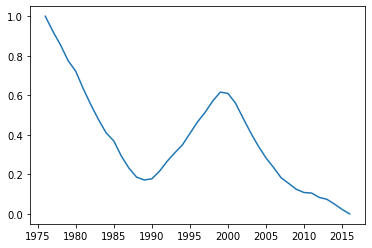

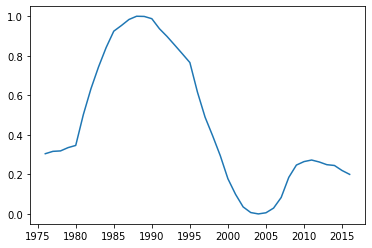

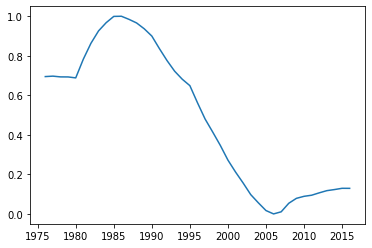

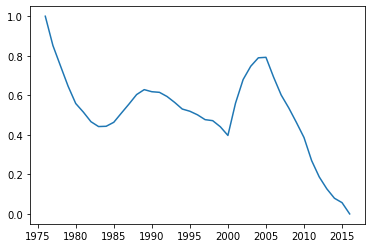

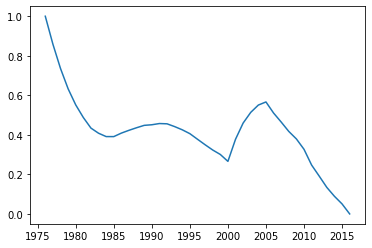

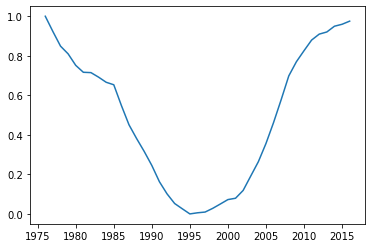

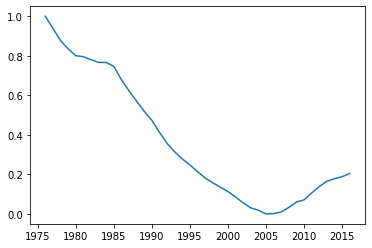

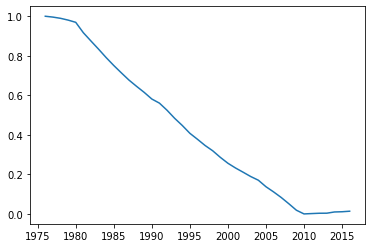

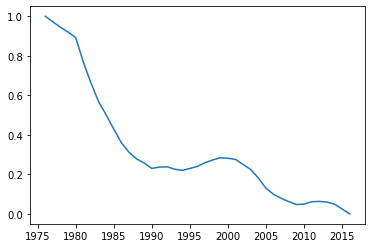

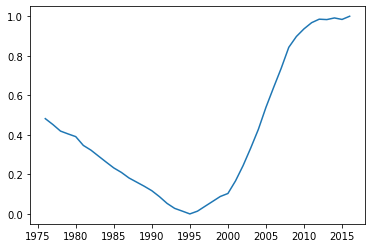

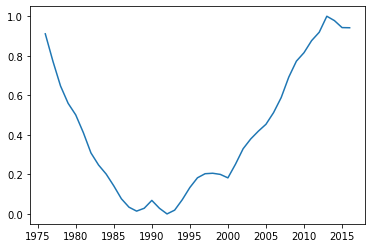

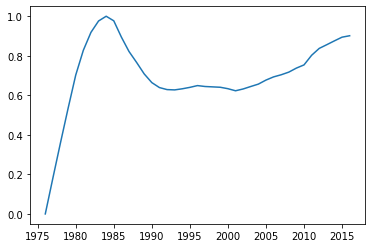

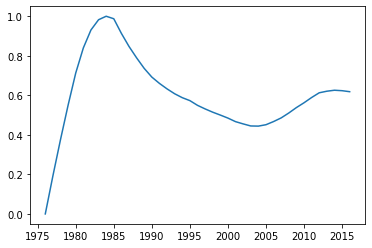

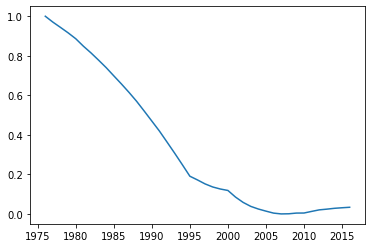

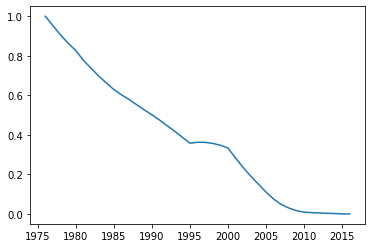

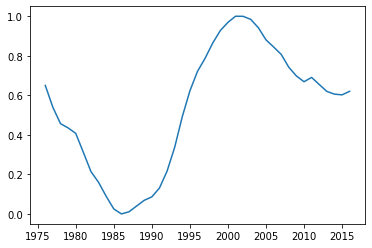

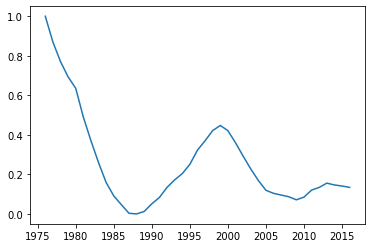

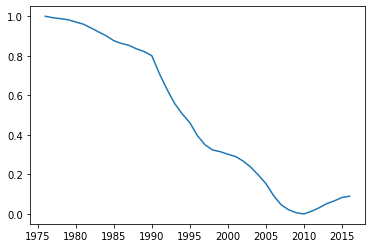

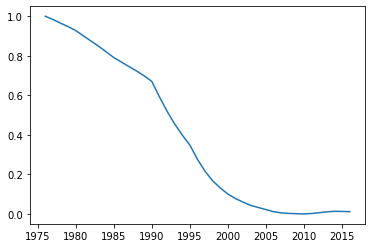

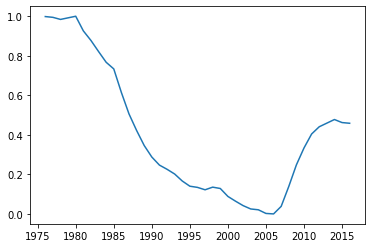

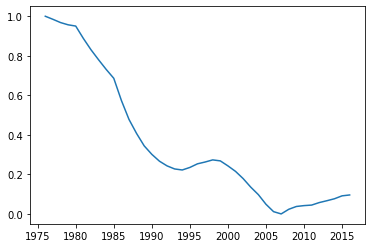

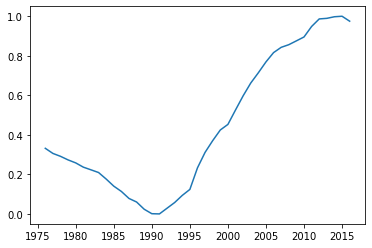

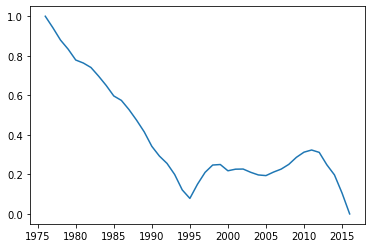

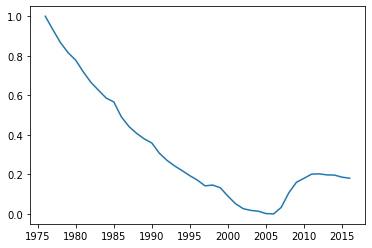

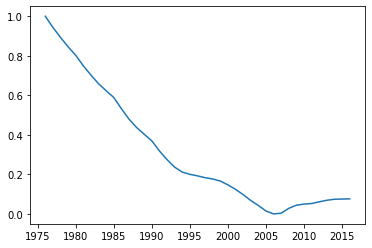

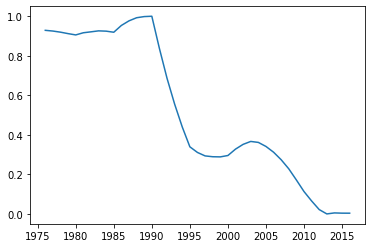

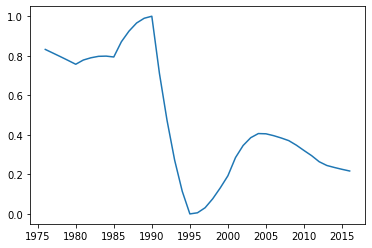

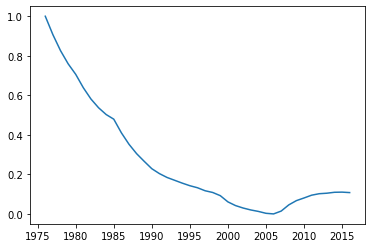

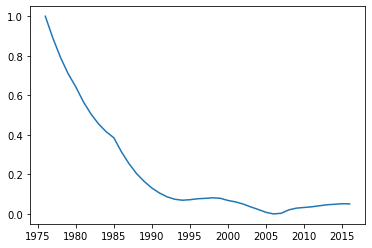

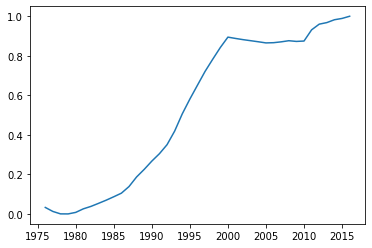

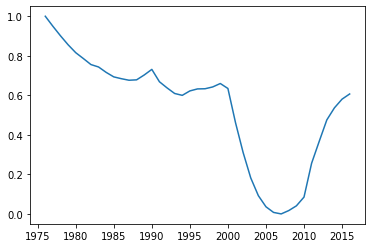

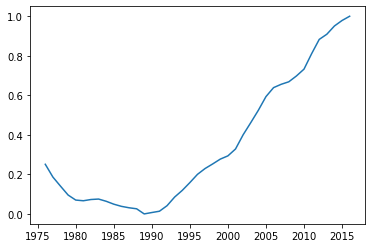

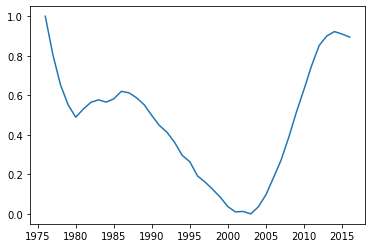

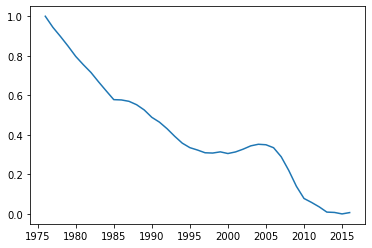

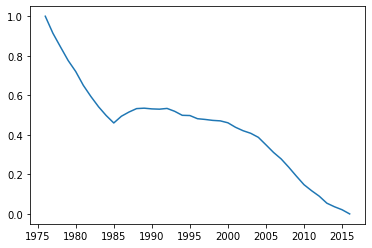

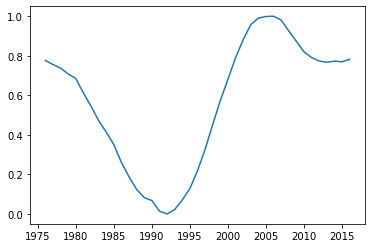

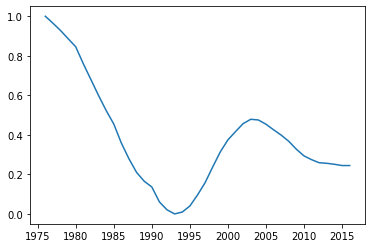

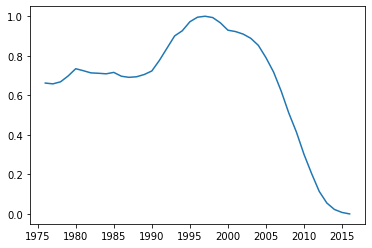

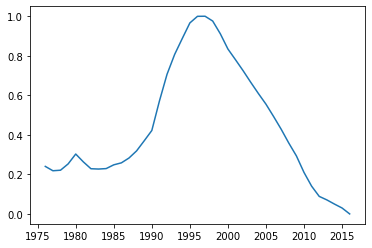

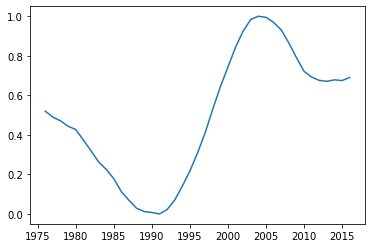

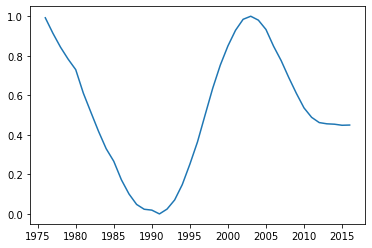

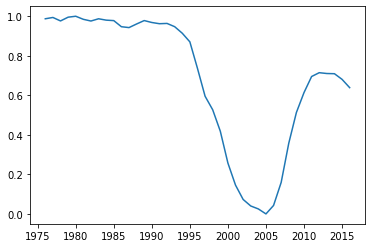

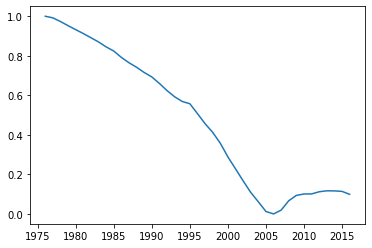

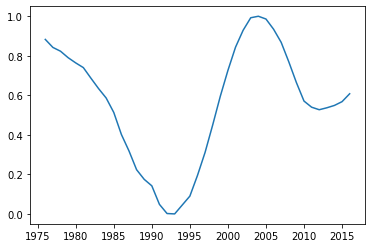

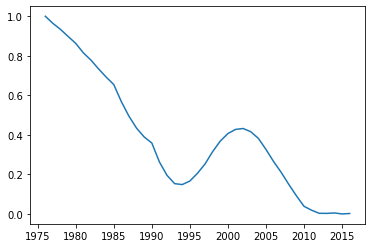

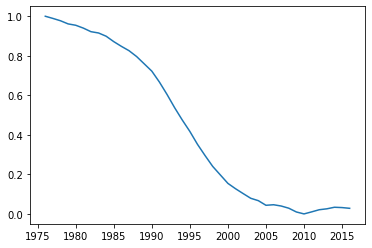

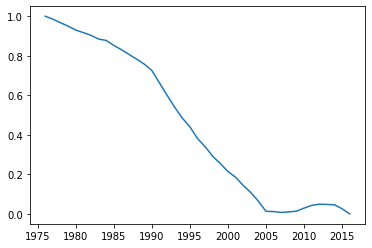

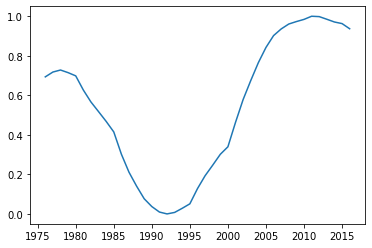

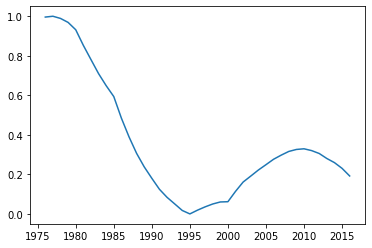

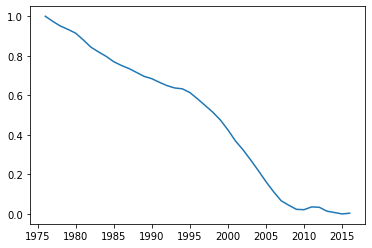

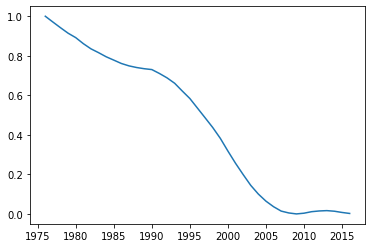

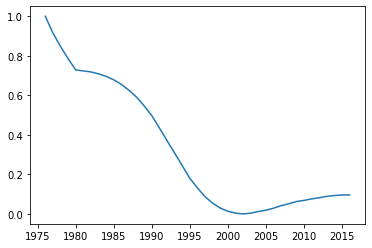

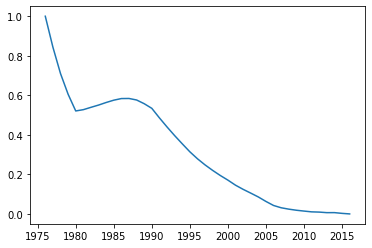

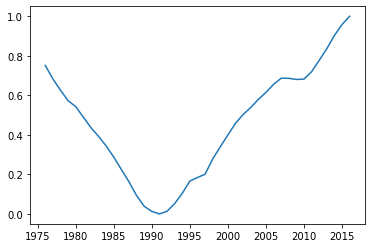

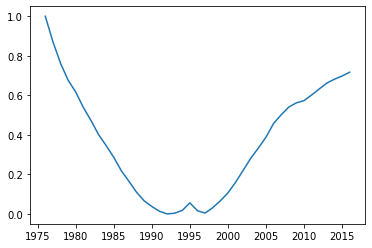

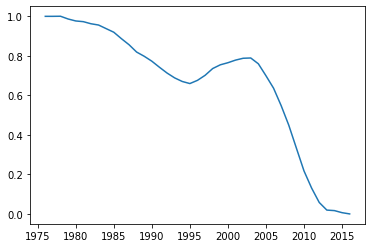

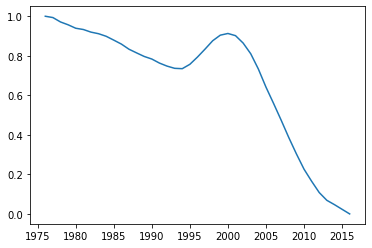

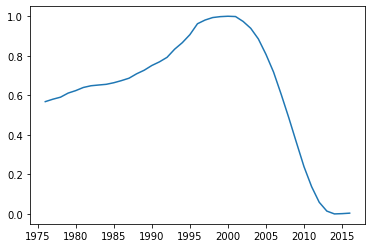

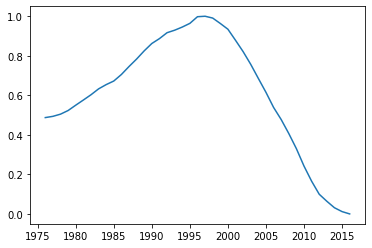

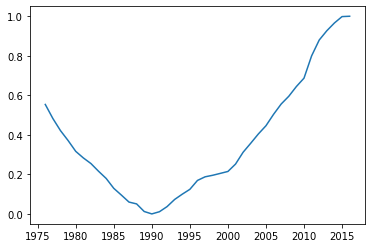

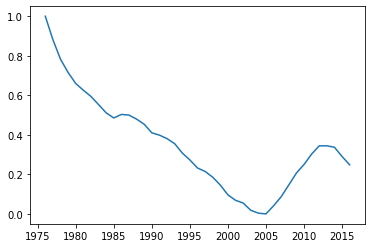

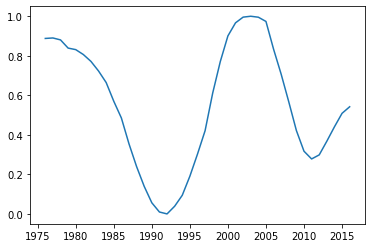

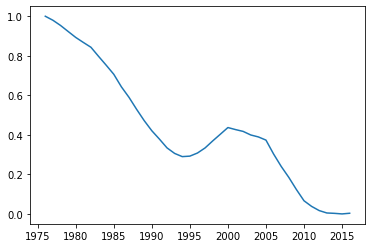

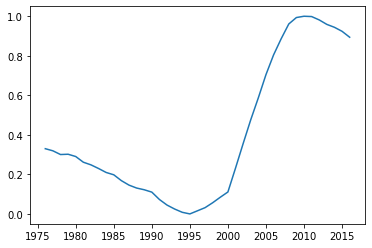

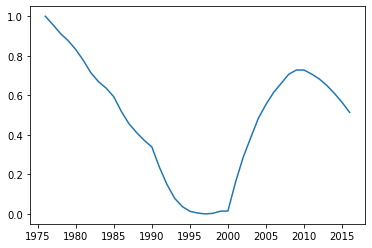

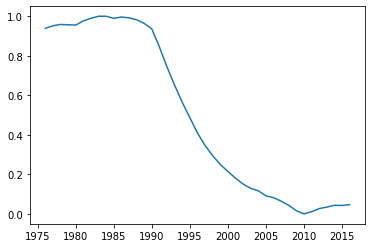

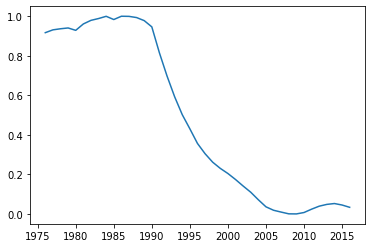

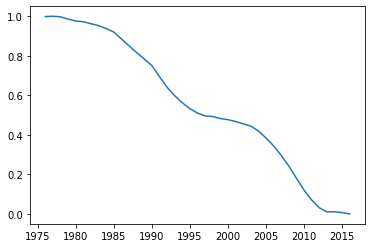

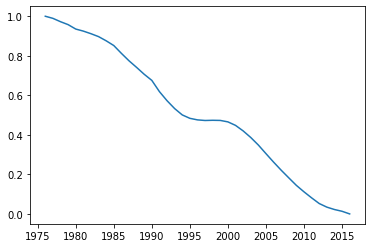

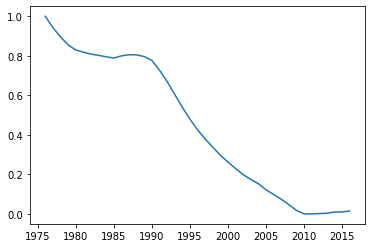

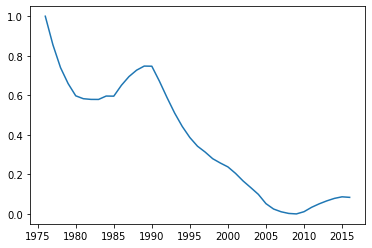

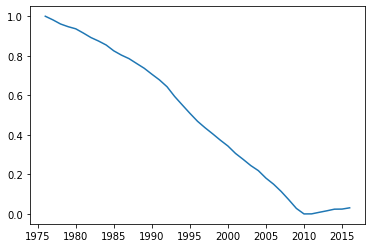

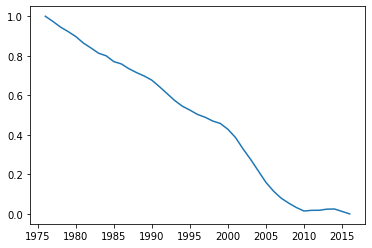

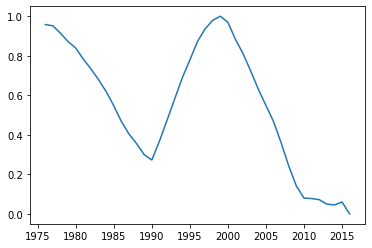

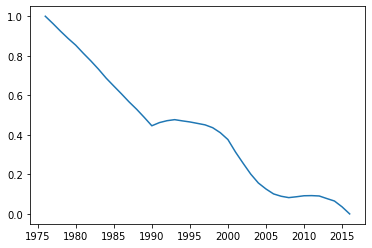

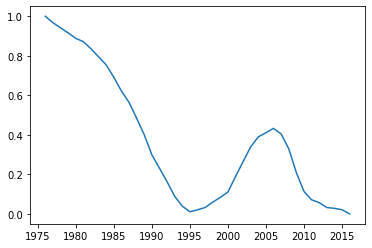

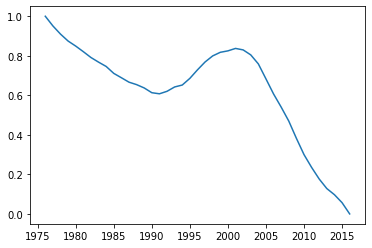

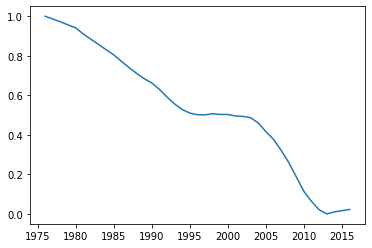

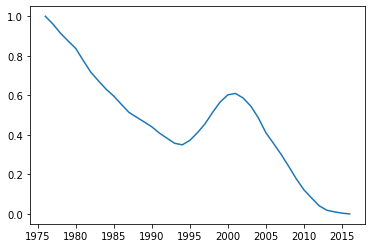

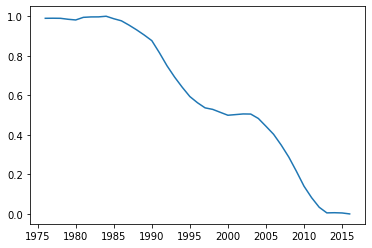

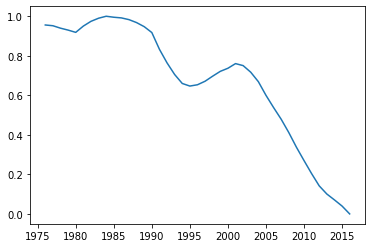

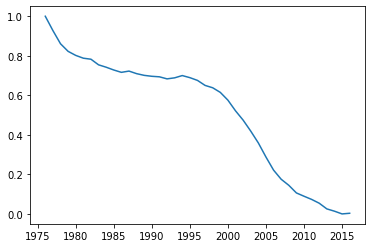

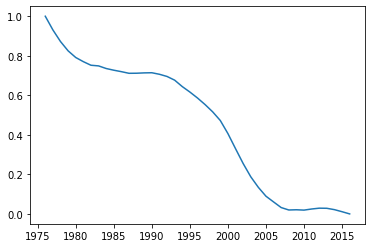

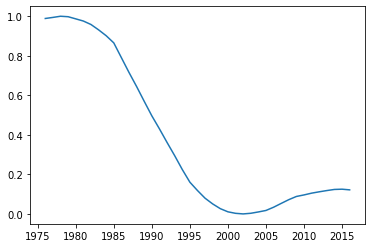

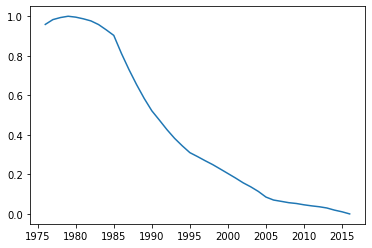

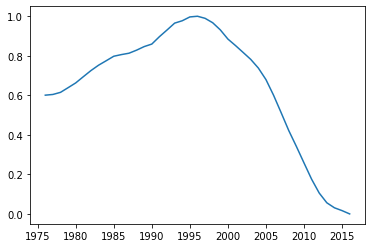

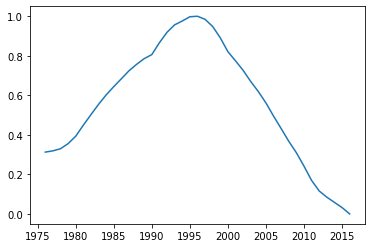

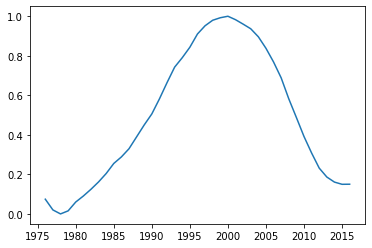

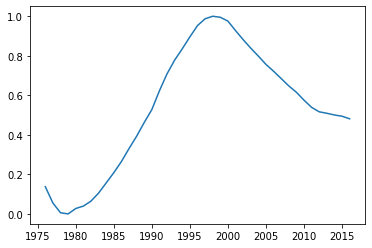

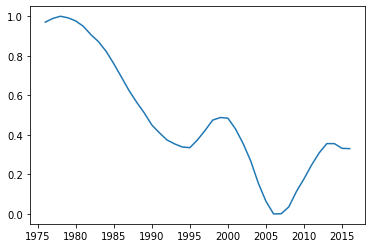

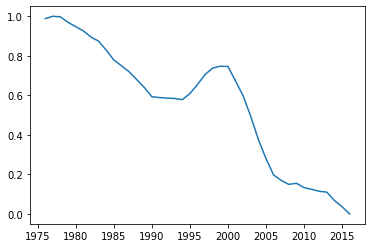

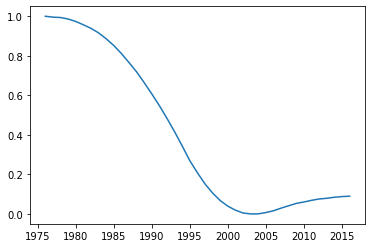

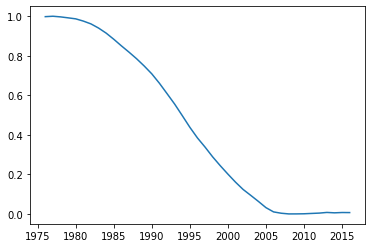

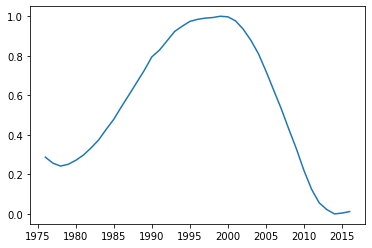

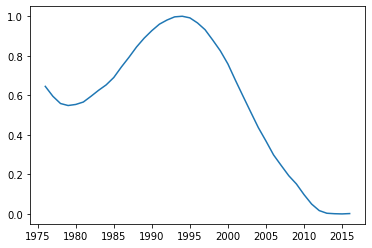

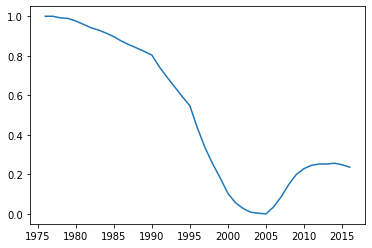

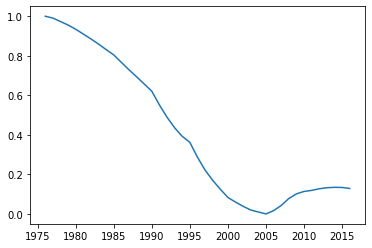

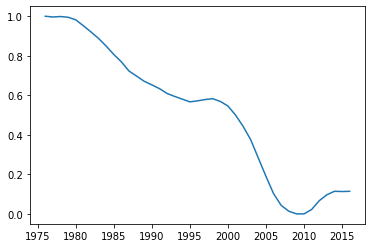

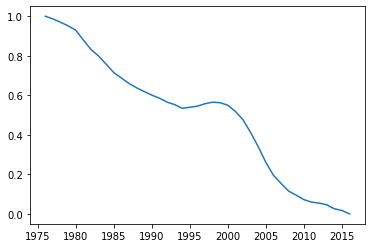

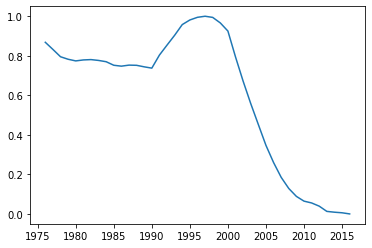

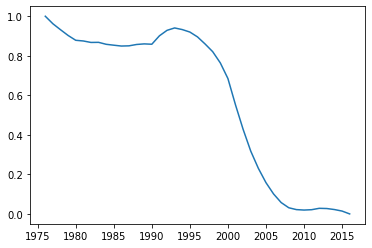

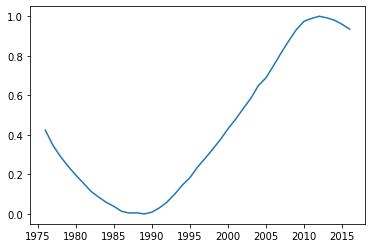

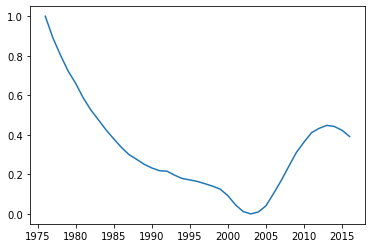

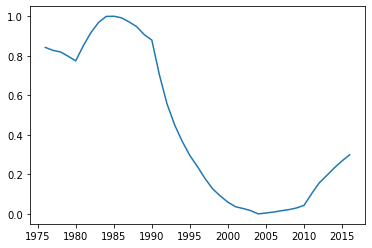

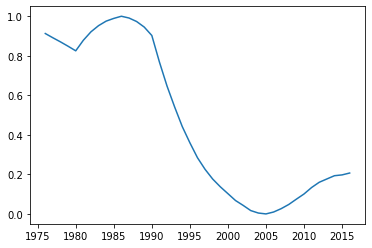

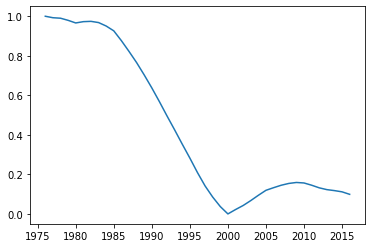

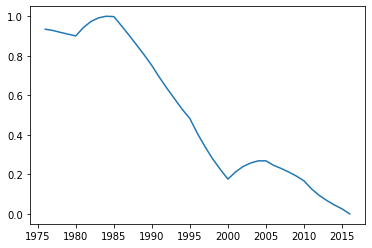

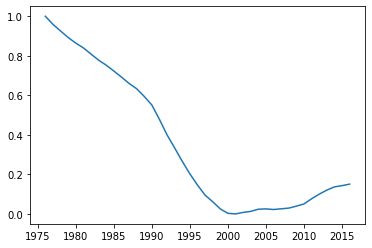

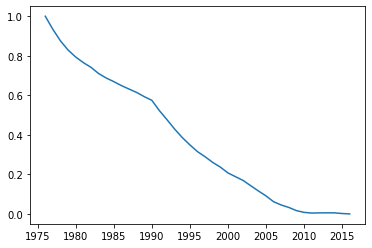

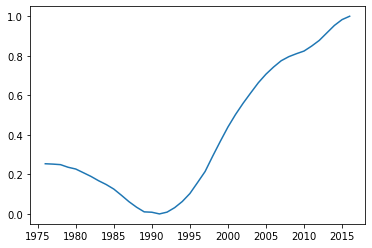

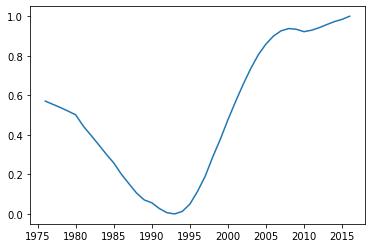

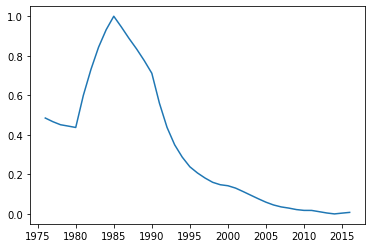

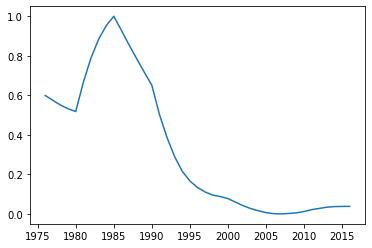

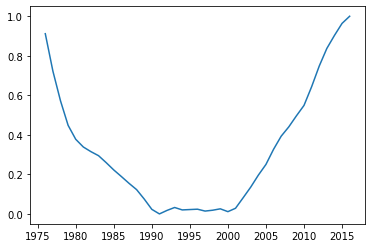

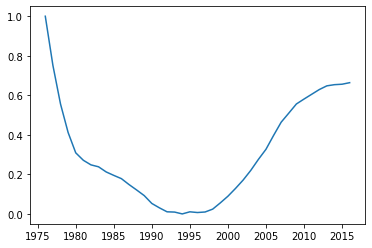

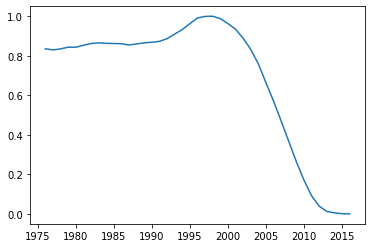

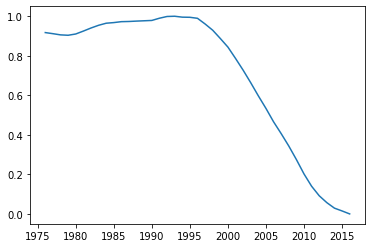

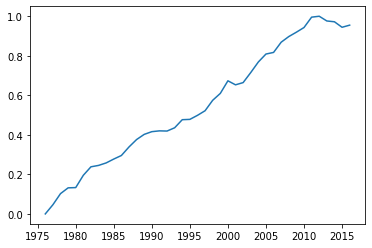

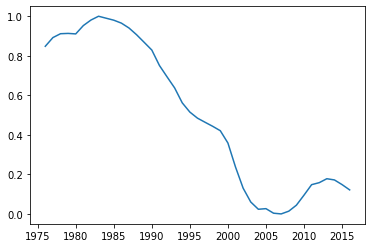

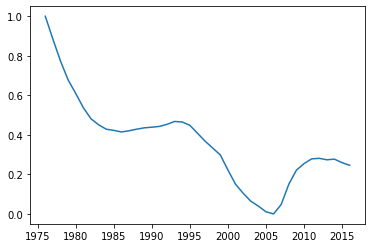

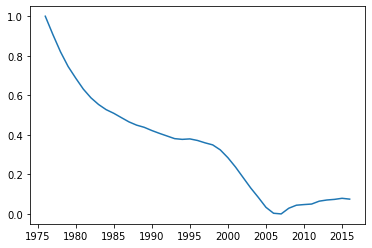

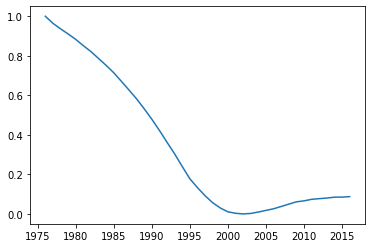

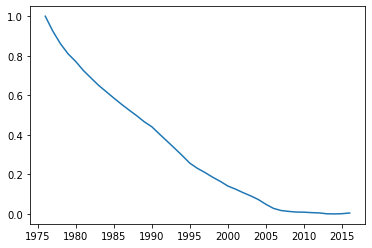

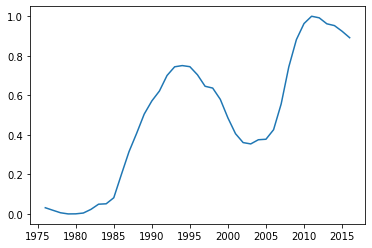

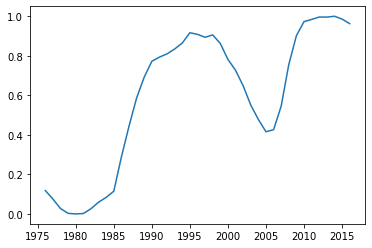

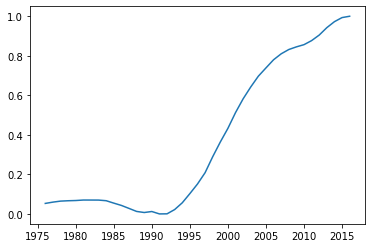

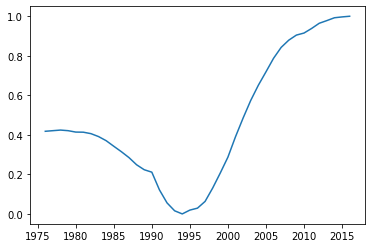

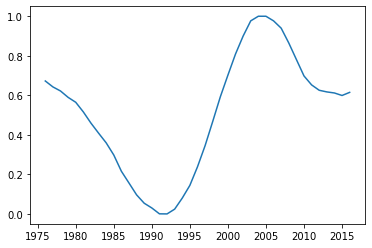

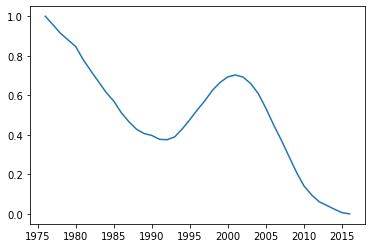

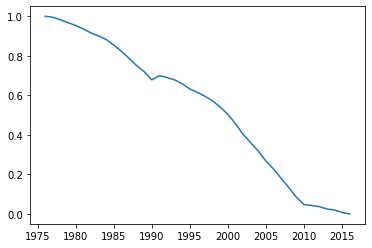

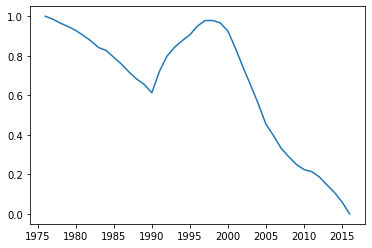

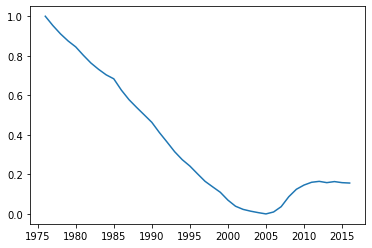

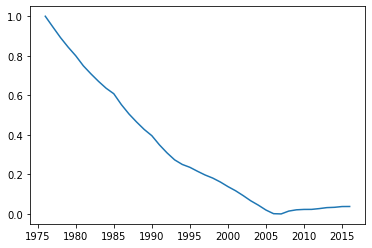

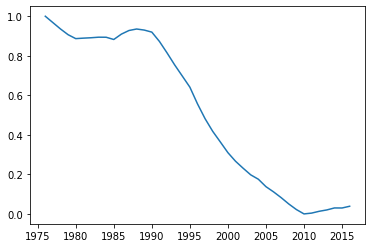

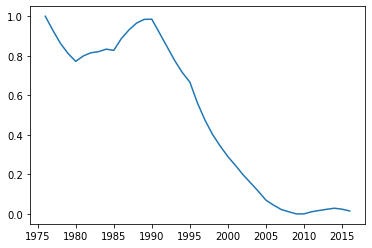

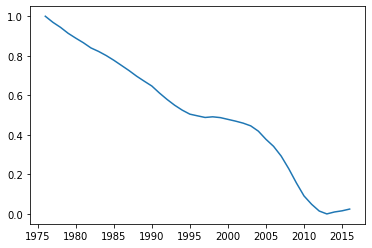

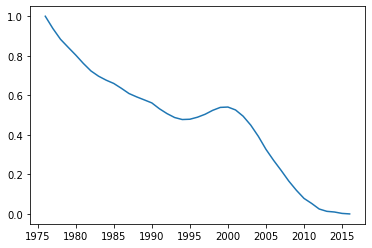

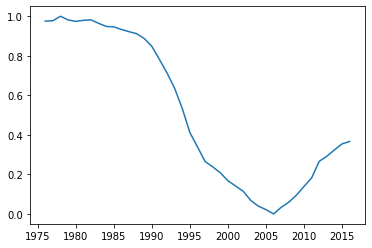

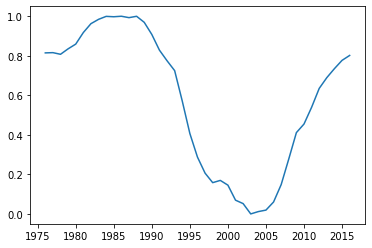

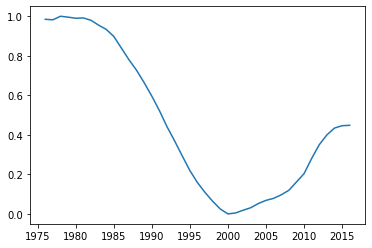

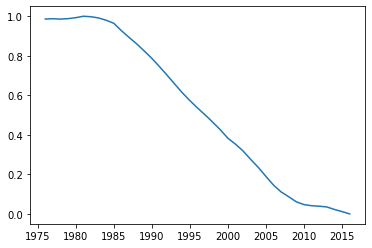

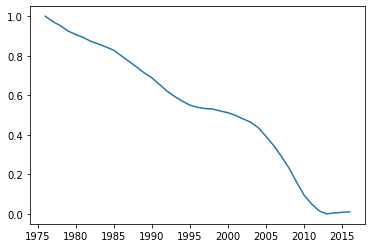

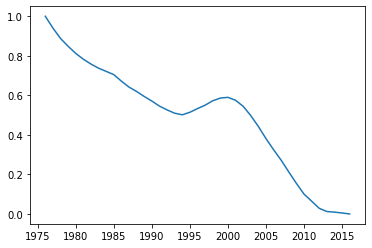

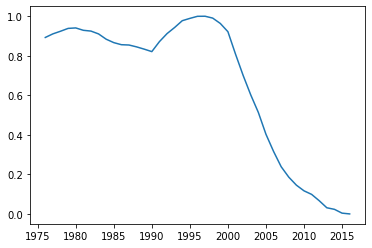

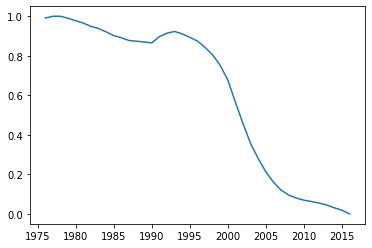

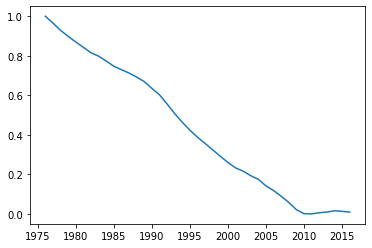

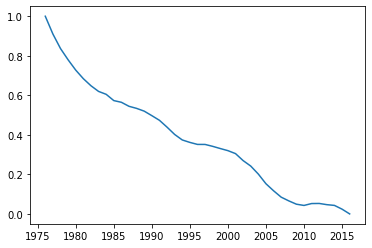

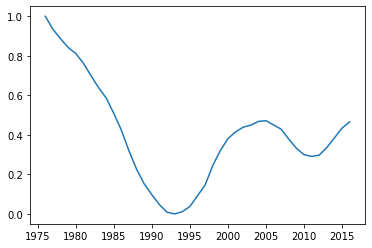

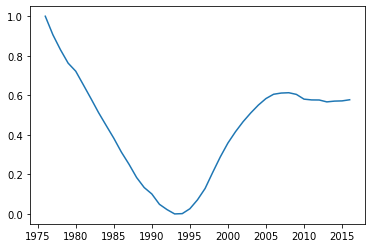

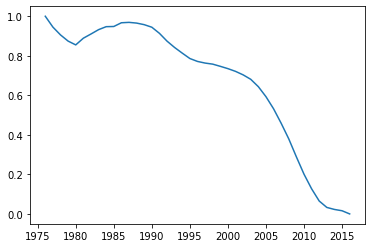

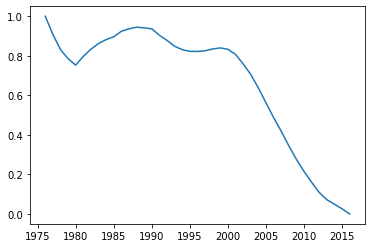

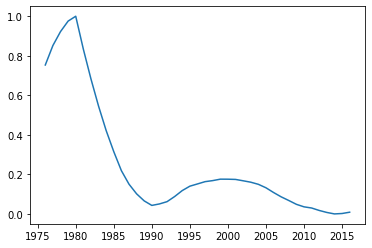

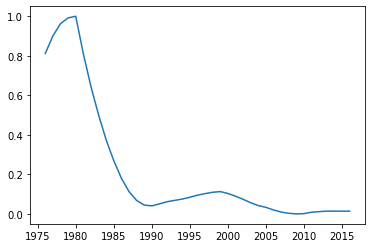

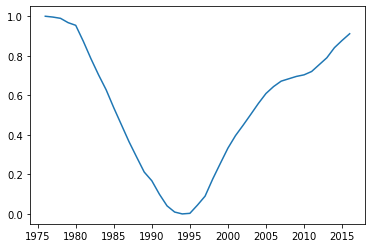

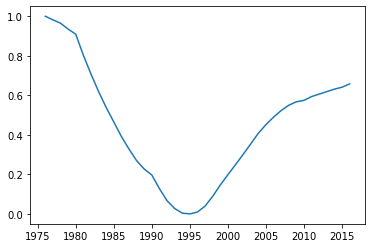

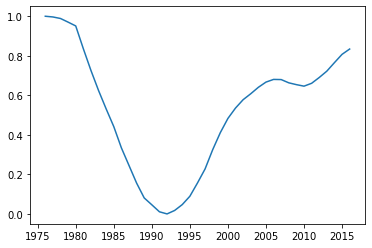

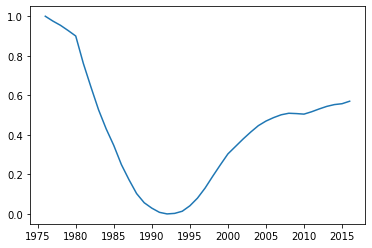

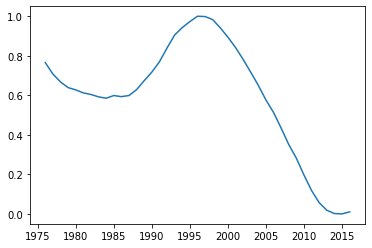

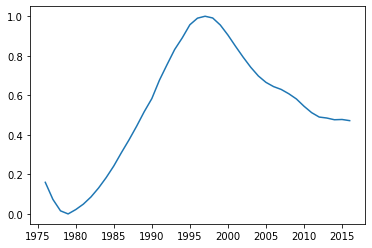

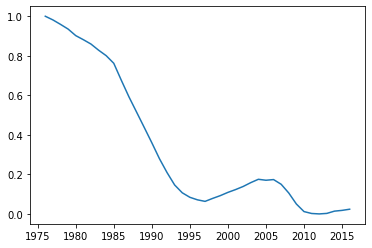

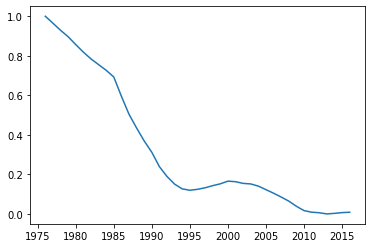

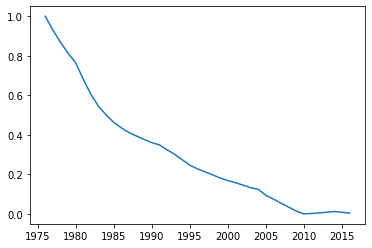

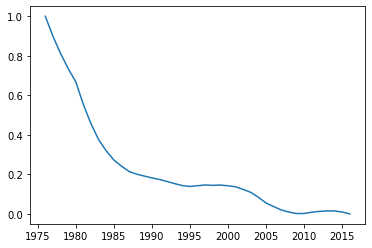

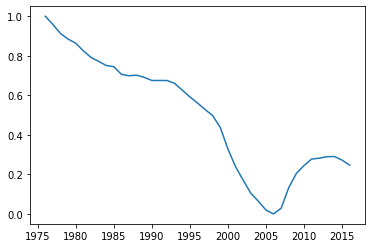

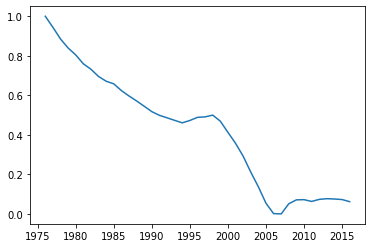

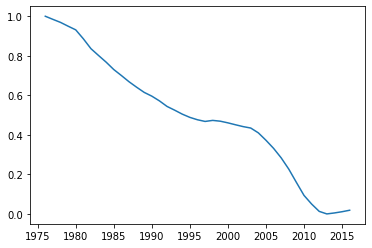

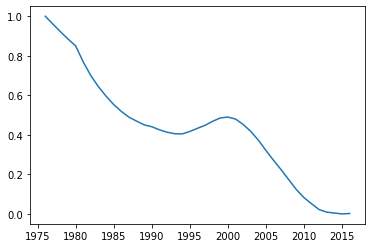

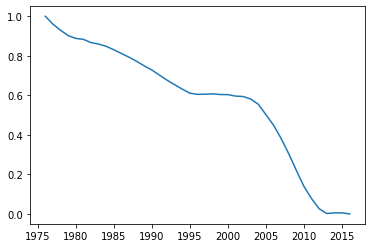

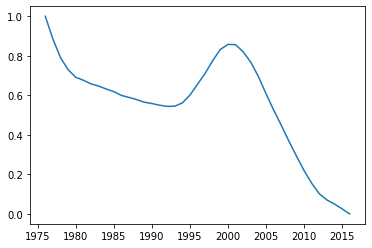

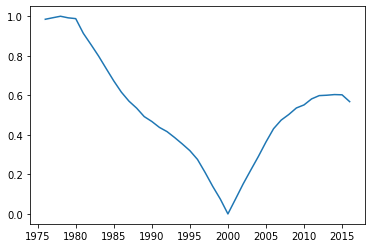

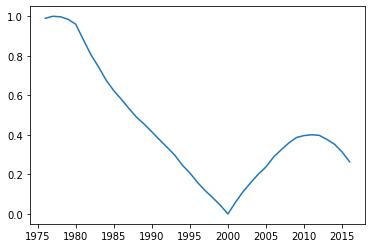

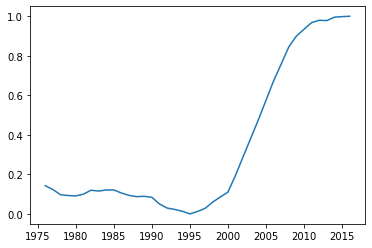

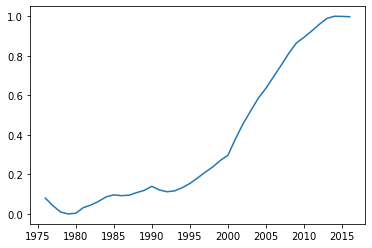

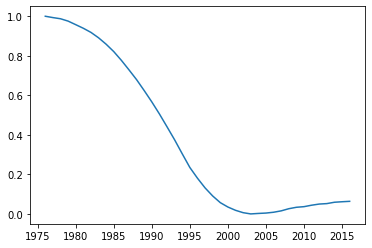

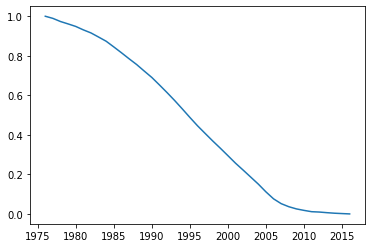

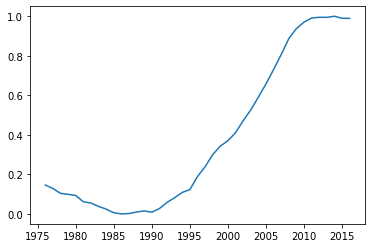

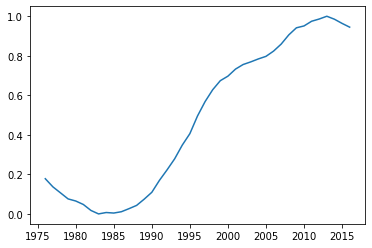

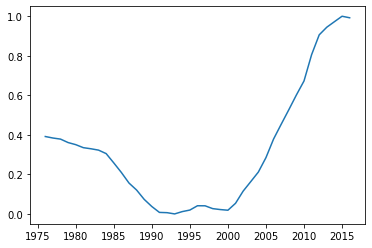

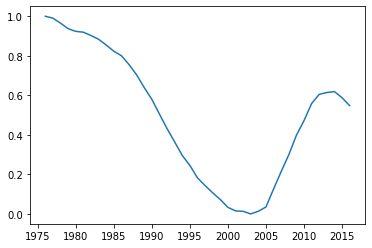

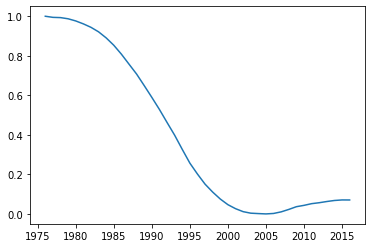

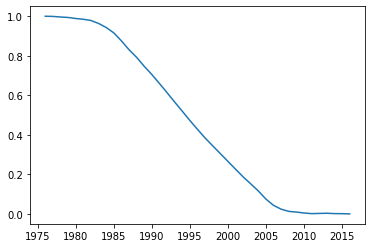

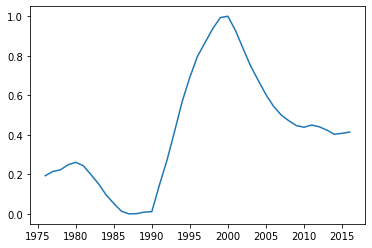

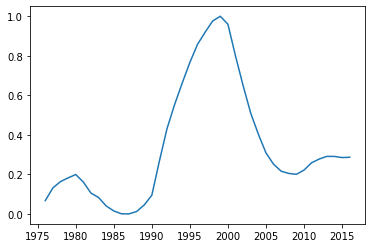

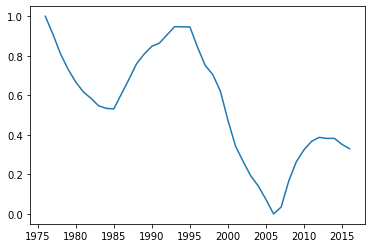

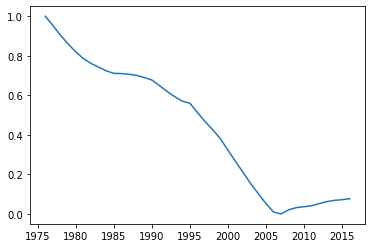

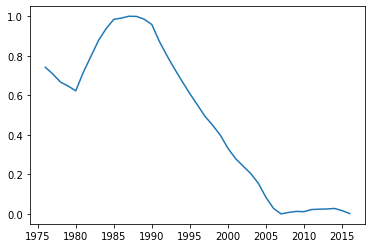

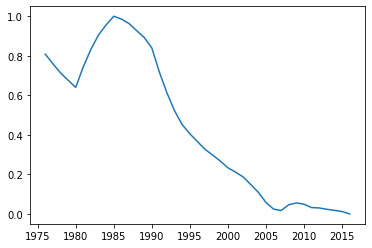

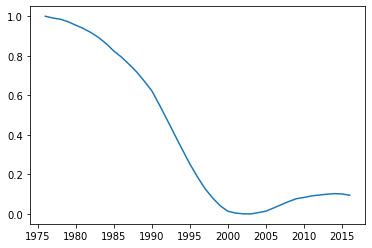

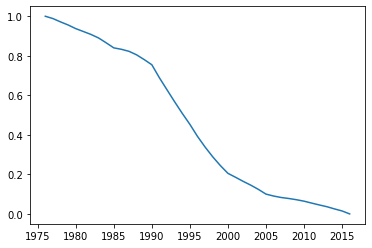

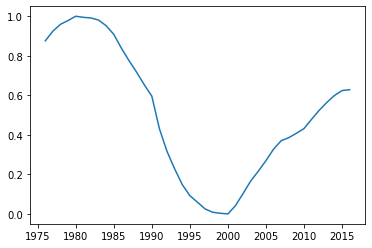

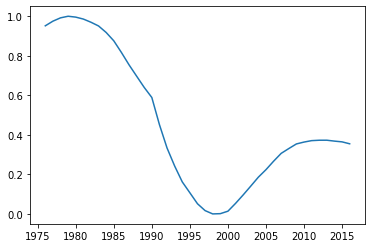

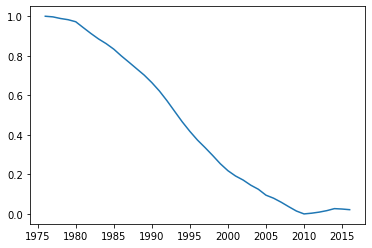

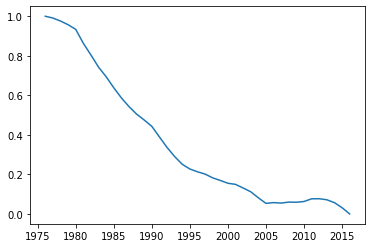

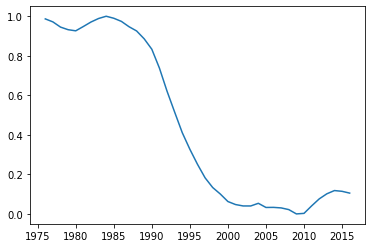

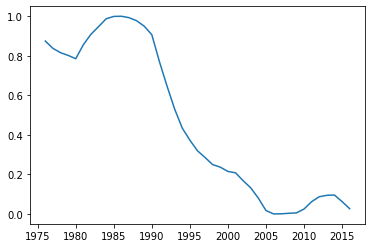

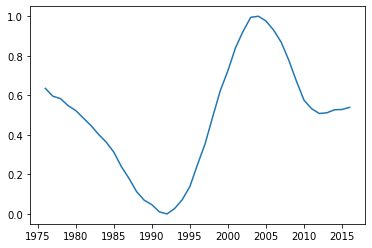

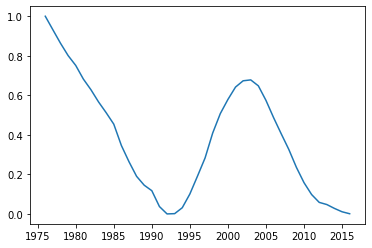

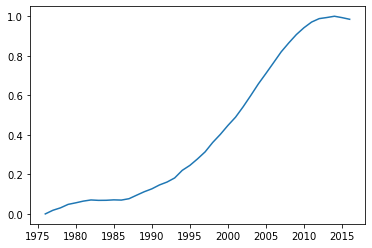

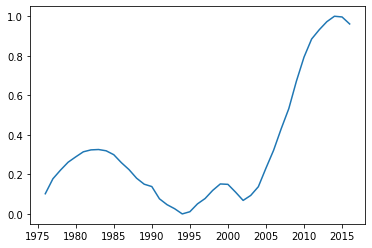

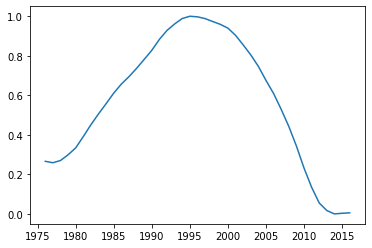

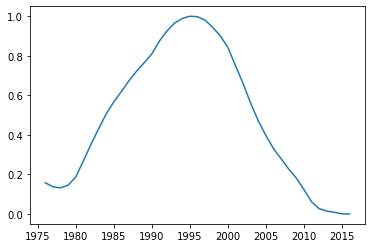

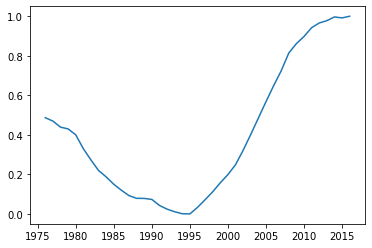

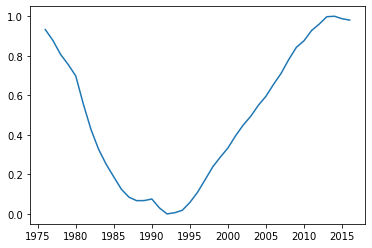

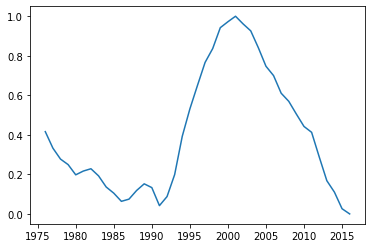

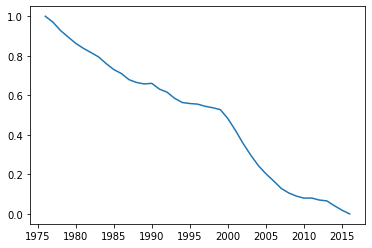

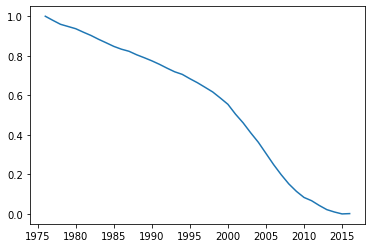

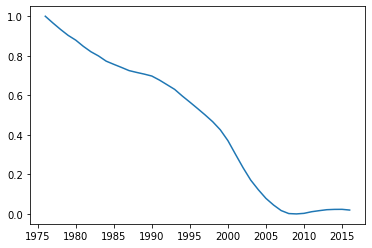

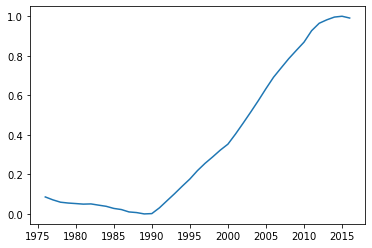

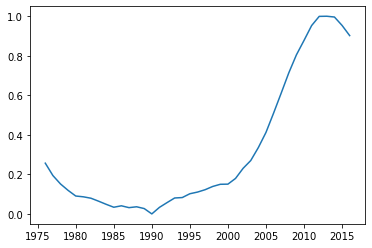

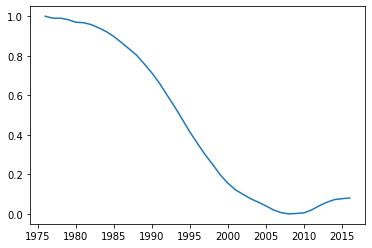

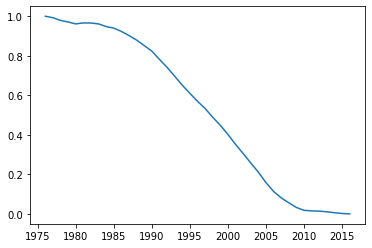

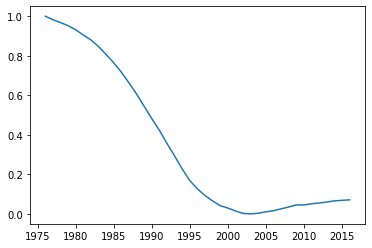

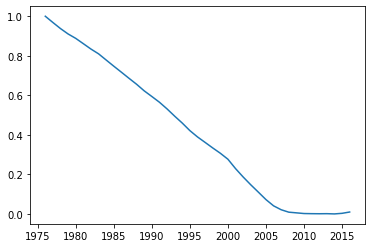

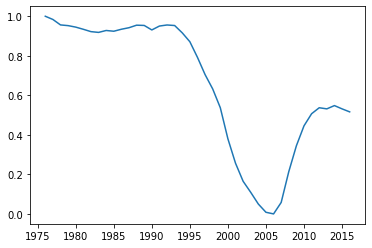

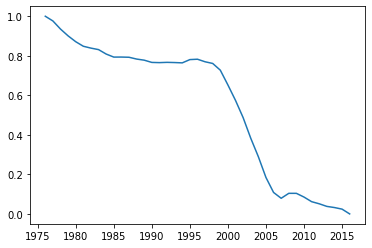

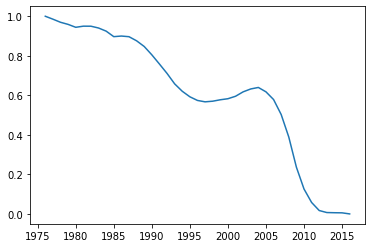

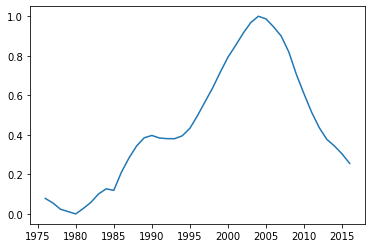

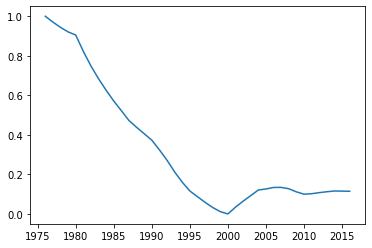

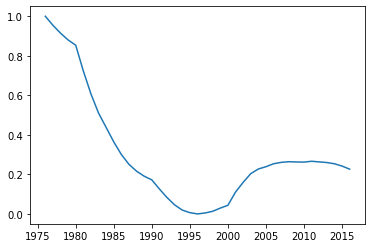

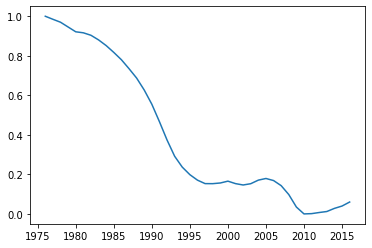

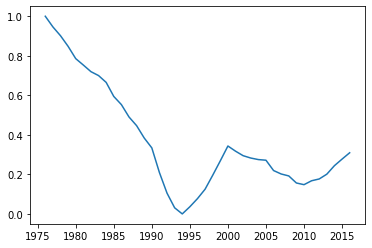

In [9]:
# look at all observations
for index, row in df_norm.iterrows():
    plt.plot(row.T)
    plt.show()
    plt.close()

In [10]:
# list of ks 
ks = list(range(2,len(df['region'].unique()) + 1))
ks

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [11]:
# clustering parameters
init = 'k-means++' # how initial clusters are selected, see documentation
n_init = 10        # number of runs
max_iter = 300    # number of iterations
tol = 0.0001       # tolerance

In [12]:
# scoring parameters
metric = 'euclidean' # see documentation

In [13]:
# to store results
# label dict = {k: list of cluster labels for each country-sex (in order that they appear in df_norm)}
# score_dict = {k: score}
label_dict = {}
score_dict = {}

In [14]:
from sklearn.cluster import KMeans # for kmeans
from sklearn.metrics import silhouette_score # for scoring ks

X = df_norm.values
for k in ks:
    labels = KMeans(n_clusters = k, n_init = n_init, max_iter = max_iter, tol = tol).fit_predict(X)
    score = silhouette_score(X, labels, metric = metric)
    label_dict[k] = labels
    score_dict[k] = score

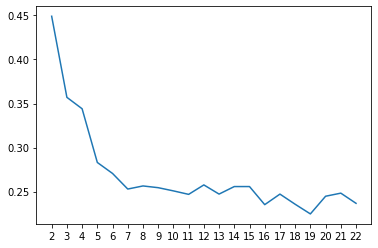

In [15]:
# look at scores for all ks
x, y = zip(*score_dict.items())
plt.plot(x, y)
plt.xticks(x)
plt.show()
plt.close()

In [16]:
# somehow choose best k
best_k = 2

0


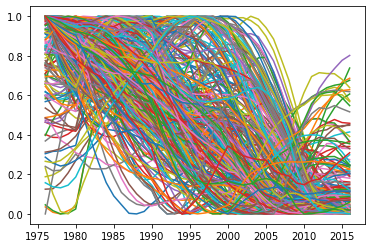

1


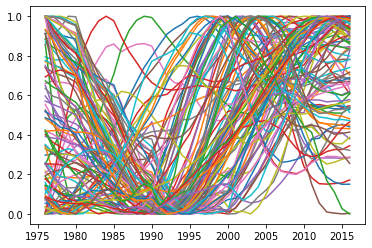

In [17]:
# visualize clusters
for label in range(best_k):
    subset = df_norm[[(x == label) for x in label_dict[best_k]]]
    print(label)
    for index, row in subset.iterrows():
        plt.plot(row.T)
    plt.show()
    plt.close()

In [19]:
# join cluster labels to data
df_labelled = df_norm.copy()
df_labelled['cluster'] = label_dict[best_k]
df_labelled

year           1976      1977      1978      1979      1980      1981  \
AFG-Men    1.000000  0.997172  0.992490  0.975667  0.962598  0.900571   
AFG-Women  1.000000  0.965212  0.929055  0.883791  0.849710  0.783008   
AGO-Men    1.000000  0.990432  0.968631  0.953694  0.933791  0.931288   
AGO-Women  1.000000  0.966561  0.935961  0.901775  0.874538  0.851261   
ALB-Men    0.297275  0.303955  0.305349  0.300879  0.296314  0.296266   
...             ...       ...       ...       ...       ...       ...   
ZAF-Women  0.078431  0.055294  0.023627  0.011667  0.000000  0.027647   
ZMB-Men    1.000000  0.970585  0.943598  0.920738  0.904999  0.822318   
ZMB-Women  1.000000  0.954409  0.914425  0.880024  0.853329  0.722948   
ZWE-Men    1.000000  0.984592  0.969748  0.945560  0.921339  0.916236   
ZWE-Women  1.000000  0.945993  0.901345  0.847631  0.785533  0.753071   

year           1982      1983      1984      1985  ...      2008      2009  \
AFG-Men    0.851709  0.786512  0.739309  0.673819  ...  0.000000  0.007802   
AFG-Women  0.723069  0.668833  0.621226  0.568625  ...  0.114574  0.104982   
AGO-Men    0.906338  0.895075  0.864998  0.827493  ...  0.199394  0.144530   
AGO-Women  0.835531  0.819017  0.801943  0.779227  ...  0.309210  0.256977   
ALB-Men    0.289346  0.268249  0.246576  0.213513  ...  0.927676  0.918641   
...             ...       ...       ...       ...  ...       ...       ...   
ZAF-Women  0.058627  0.101078  0.126961  0.119118  ...  0.819608  0.705490   
ZMB-Men    0.748559  0.683518  0.625417  0.570897  ...  0.127248  0.111610   
ZMB-Women  0.606940  0.510060  0.437220  0.364173  ...  0.264155  0.262701   
ZWE-Men    0.903711  0.880318  0.851590  0.817064  ...  0.097946  0.034758   
ZWE-Women  0.719633  0.699844  0.665334  0.594268  ...  0.192143  0.156463   

year           2010      2011      2012      2013      2014      2015  \
AFG-Men    0.011703  0.042229  0.073975  0.108743  0.116789  0.116204   
AFG-Women  0.087477  0.074924  0.068293  0.058701  0.035627  0.022146   
AGO-Men    0.099839  0.065079  0.049576  0.031409  0.025717  0.014251   
AGO-Women  0.206090  0.172165  0.132561  0.105212  0.072557  0.043826   
ALB-Men    0.911192  0.914941  0.925321  0.952040  0.977366  1.000000   
...             ...       ...       ...       ...       ...       ...   
ZAF-Women  0.607549  0.514706  0.436667  0.376961  0.343725  0.303431   
ZMB-Men    0.099897  0.102183  0.107645  0.112177  0.115899  0.115312   
ZMB-Women  0.262194  0.266393  0.263163  0.259933  0.253703  0.242098   
ZWE-Men    0.000000  0.001425  0.007124  0.012160  0.028032  0.039861   
ZWE-Women  0.147982  0.167771  0.176838  0.201111  0.244102  0.277247   

year           2016  cluster  
AFG-Men    0.115473        9  
AFG-Women  0.000000        2  
AGO-Men    0.000000        6  
AGO-Women  0.000000        6  
ALB-Men    0.990917        5  
...             ...      ...  
ZAF-Women  0.255686        3  
ZMB-Men    0.114564        9  
ZMB-Women  0.226409       12  
ZWE-Men    0.060205        9  
ZWE-Women  0.309320        2  

[400 rows x 42 columns]

In [20]:
# get index-label mapping
indexes = df_norm.index
labels = label_dict[best_k]
map_dict = {indexes[i]: labels[i] for i in range(len(indexes))}
map_df = pd.DataFrame.from_dict(map_dict, orient = 'index', columns = ['cluster_ID'])
map_df

cluster_ID
AFG-Men             9
AFG-Women           2
AGO-Men             6
AGO-Women           6
ALB-Men             5
...               ...
ZAF-Women           3
ZMB-Men             9
ZMB-Women          12
ZWE-Men             9
ZWE-Women           2

[400 rows x 1 columns]

In [22]:
# sort by cluster number 
# merge map_df to df 
map_df.reset_index()

index  cluster_ID
0      AFG-Men           9
1    AFG-Women           2
2      AGO-Men           6
3    AGO-Women           6
4      ALB-Men           5
..         ...         ...
395  ZAF-Women           3
396    ZMB-Men           9
397  ZMB-Women          12
398    ZWE-Men           9
399  ZWE-Women           2

[400 rows x 2 columns]

In [26]:
map_df['index1'] = map_df.index
map_df

cluster_ID     index1
AFG-Men             9    AFG-Men
AFG-Women           2  AFG-Women
AGO-Men             6    AGO-Men
AGO-Women           6  AGO-Women
ALB-Men             5    ALB-Men
...               ...        ...
ZAF-Women           3  ZAF-Women
ZMB-Men             9    ZMB-Men
ZMB-Women          12  ZMB-Women
ZWE-Men             9    ZWE-Men
ZWE-Women           2  ZWE-Women

[400 rows x 2 columns]

In [28]:
#df_out = df.merge(map_df, on='index')
df_out = pd.DataFrame.merge(df, map_df, how='inner', left_on='index', right_on='index1')
df_out

country  iso    sex        super_region           region  year  \
0      Afghanistan  AFG    Men          South Asia       South Asia  1975   
1      Afghanistan  AFG    Men          South Asia       South Asia  1976   
2      Afghanistan  AFG    Men          South Asia       South Asia  1977   
3      Afghanistan  AFG    Men          South Asia       South Asia  1978   
4      Afghanistan  AFG    Men          South Asia       South Asia  1979   
...            ...  ...    ...                 ...              ...   ...   
16795     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2012   
16796     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2013   
16797     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2014   
16798     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2015   
16799     Zimbabwe  ZWE  Women  Sub-Saharan Africa  Southern Africa  2016   

            bmi      rate      index  cluster_ID     index1  
0      18.99944       NaN    AFG-Men           9    AFG-Men  
1      19.10552  0.005583    AFG-Men           9    AFG-Men  
2      19.21208  0.005577    AFG-Men           9    AFG-Men  
3      19.31905  0.005568    AFG-Men           9    AFG-Men  
4      19.42595  0.005533    AFG-Men           9    AFG-Men  
...         ...       ...        ...         ...        ...  
16795  25.28484  0.001364  ZWE-Women           2  ZWE-Women  
16796  25.31995  0.001388  ZWE-Women           2  ZWE-Women  
16797  25.35622  0.001433  ZWE-Women           2  ZWE-Women  
16798  25.39341  0.001467  ZWE-Women           2  ZWE-Women  
16799  25.43149  0.001499  ZWE-Women           2  ZWE-Women  

[16800 rows x 11 columns]

In [40]:
# group by cluster id, then print unique countries?
df_group = df_out.groupby(['cluster_ID', 'country']).size().reset_index(name='count')
df_group


cluster_ID      country  count
0             0    Australia     42
1             0       Bhutan     42
2             0   Cabo Verde     42
3             0       Canada     42
4             0   Costa Rica     84
..          ...          ...    ...
301          12    Sri Lanka     42
302          12       Taiwan     84
303          12     Thailand     84
304          12  Timor-Leste     42
305          12       Zambia     42

[306 rows x 3 columns]

In [43]:
df_group.to_csv('country_cluster.csv', index=False)

In [27]:
# kmeans documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# x = data
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [28]:
# first need to normalize things 
# goal is to analyze kmeans for bmi rate x time , right? 